<a id="1"></a>
# <p style="padding:15px;background-color:#0F333D;margin:0;color:#D4FFCA;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">Smart Shopper Profiling System Using RFM-T and Clustering</p>

<div style="background-color:#D4FFCA; padding:30px; font-size:14px; border-radius: 5px 5px;">

**🛒Goal:**
    
The main issue at hand is how to effectively profile customers based on their transaction frequency and spending amount. With a wide range of customer information, companies need to analyze this data in depth to identify patterns and trends that can help improve their business strategies. By applying clustering techniques, companies can group customers into different segments based on their purchasing patterns. This solution provides a holistic view of customer behavior, allowing companies to develop more effective marketing strategies, improve customer service, and ultimately drive customer growth and loyalty.

<div style="background-color:#D4FFCA; padding:30px; font-size:14px; border-radius: 5px 5px;">
    
The following is a complete explanation of each feature in the `df` dataframe:
    
**📃 Data:**

|       | **Attribute**          | **Information**                                                 |
| :---  | :--------------------- | :-------------------------------------------------------------- |
| **1** | **Transaction ID**     | Unique ID of the transaction                                    |
| **2** | **Customer ID**        | Unique ID of the customer (Primary key)                         |
| **3** | **Name**               | Name of the customer                                            |
| **4** | **Email**              | Email address                                                   |
| **5** | **Phone**              | Contact number                                                  |
| **6** | **Address**            | Address                                                         |
| **7** | **City**               | City                                                            |
| **8** | **State**              | State                                                           |
| **9** | **Zipcode**            | Postal code                                                     |
| **10**| **Country**            | Country                                                         |
| **11**| **Age**                | Age                                                             |
| **12**| **Gender**             | Gender                                                          |
| **13**| **Income**             | Income level                                                    |
| **14**| **Date**               | Date of the last transaction                                    |
| **15**| **Year**               | Year of the transaction                                         |
| **16**| **Month**              | Month of the transaction                                        |
| **17**| **Time**               | Time of the transaction                                         |
| **18**| **Total Purchases**    | Total number of purchases made by the customer                  |
| **19**| **Amount**             | Amount of money spent in a single transaction                   |
| **20**| **Total Amount**       | Total amount of money spent by the customer                     |
| **21**| **Product Category**   | Category of the product purchased (e.g., electronics, clothing, groceries) |
| **22**| **Product Brand**      | Brand of the product purchased                                  |
| **23**| **Product Type**       | Type or model of the product purchased                          |
| **24**| **Feedback**           | Customer feedback or rating regarding the product or service received |
| **25**| **Shipping Method**    | Method used to ship the purchased product                       |
| **26**| **Payment Method**     | Payment method used                                             |
| **27**| **Order Status**       | Order status (e.g., shipped, received, canceled)                |
| **28**| **Ratings**            | Customer rating of the product or service                       |
| **29**| **Products**           | List of products purchased                                      |

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import plotly.graph_objs as go
import plotly.express    as px
import matplotlib.colors as mcolors

In [4]:
from   pyforest          import *
from   tqdm              import tqdm
from   plotly.offline    import iplot
from   scipy             import stats
from   termcolor         import colored
from   sklearn           import metrics
from   plotly.subplots   import make_subplots
from   sklearn.metrics   import accuracy_score
from   datetime          import date, timedelta
from   kneed             import KneeLocator, DataGenerator
from   sklearn.metrics   import silhouette_score, calinski_harabasz_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

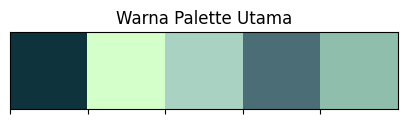

In [5]:
# kumpulan warna palet
colors     = ["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"]
my_palette = sns.color_palette(["#0F333D", "#D4FFCA", "#A9D2C2", "#4A6D76", "#8FBFAC"])
cmap       = mcolors.ListedColormap(colors)

sns.palplot(sns.color_palette(colors))
plt.title('Warna Palette Utama')
plt.show()

<a id="1"></a>
# <p style="padding:15px;background-color:#0F333D;margin:0;color:#D4FFCA;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">2. Data Understanding</p>

In [7]:
data = pd.read_csv('your_path')

In [8]:
df   = pd.DataFrame(data)
df

<IPython.core.display.Javascript object>

Transaction_ID  Customer_ID                 Name  \
0           8691788.0      37249.0  Michelle Harrington   
1           2174773.0      69749.0          Kelsey Hill   
2           6679610.0      30192.0         Scott Jensen   
3           7232460.0      62101.0        Joseph Miller   
4           4983775.0      27901.0        Debra Coleman   
...               ...          ...                  ...   
63807       9188371.0      27052.0        Alexis Henson   
63808       4731811.0      13110.0      Stephanie Smith   
63809       2191186.0      78280.0           Eric Kelly   
63810       6545007.0      76002.0          Jason Myers   
63811       3175779.0      65515.0         Dana Griffin   

                       Email         Phone                       Address  \
0          Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1           Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2          Shane85@gmail.com  8.362160e+09             4133 Young Canyon   
3           Mary34@gmail.com  2.776752e+09   8148 Thomas Creek Suite 100   
4        Charles30@gmail.com  9.098268e+09     5813 Lori Ports Suite 269   
...                      ...           ...                           ...   
63807    Kenneth51@gmail.com  1.144956e+09               590 Davis Drive   
63808  Christine35@gmail.com  1.163515e+09         18986 Vasquez Landing   
63809      David15@gmail.com  7.577438e+09           71563 Arthur Forges   
63810     Heather3@gmail.com  8.021119e+09  56565 Kayla Prairie Apt. 545   
63811    Timothy36@gmail.com  1.316427e+09               791 Kevin Ville   

                      City            State  Zipcode    Country  ...  \
0                 Dortmund           Berlin  77985.0    Germany  ...   
1               Nottingham          England  99071.0         UK  ...   
2                  Geelong  New South Wales  75929.0  Australia  ...   
3                 Edmonton          Ontario  88420.0     Canada  ...   
4                  Bristol          England  48704.0         UK  ...   
...                    ...              ...      ...        ...  ...   
63807              Dresden           Berlin  75293.0    Germany  ...   
63808               Bremen           Berlin  31786.0    Germany  ...   
63809             Brisbane  New South Wales  64989.0  Australia  ...   
63810              Leipzig           Berlin  41665.0    Germany  ...   
63811  Newcastle upon Tyne          England  85757.0         UK  ...   

       Total_Amount Product_Category  Product_Brand Product_Type   Feedback  \
0        324.086270         Clothing           Nike       Shorts  Excellent   
1        806.707815      Electronics        Samsung       Tablet  Excellent   
2       1063.432799            Books  Penguin Books   Children's    Average   
3       2466.854021       Home Decor     Home Depot        Tools  Excellent   
4        248.553049          Grocery         Nestle    Chocolate        Bad   
...             ...              ...            ...          ...        ...   
63807   2020.042575         Clothing           Zara        Dress       Good   
63808    415.139044      Electronics        Samsung   Smartphone        Bad   
63809   4055.458230          Grocery          Pepsi   Soft Drink    Average   
63810   2341.346704      Electronics        Samsung   Television        Bad   
63811    443.623624      Electronics           Sony   Headphones       Good   

       Shipping_Method Payment_Method Order_Status  Ratings           products  
0             Same-Day     Debit Card      Shipped      5.0     Cycling shorts  
1             Standard    Credit Card   Processing      4.0         Lenovo Tab  
2             Same-Day    Credit Card   Processing      2.0   Sports equipment  
3             Standard         PayPal   Processing      4.0      Utility knife  
4             Standard           Cash      Shipped      1.0  Chocolate cookies  
...                ...            ...          ...      ...                ...  
6380

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63812 entries, 0 to 63811
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    63746 non-null  float64
 1   Customer_ID       63737 non-null  float64
 2   Name              63754 non-null  object 
 3   Email             63731 non-null  object 
 4   Phone             63723 non-null  float64
 5   Address           63743 non-null  object 
 6   City              63781 non-null  object 
 7   State             63772 non-null  object 
 8   Zipcode           63746 non-null  float64
 9   Country           63775 non-null  object 
 10  Age               63809 non-null  float64
 11  Gender            63730 non-null  object 
 12  Income            63779 non-null  object 
 13  Customer_Segment  63812 non-null  object 
 14  Date              63733 non-null  object 
 15  Year              63748 non-null  float64
 16  Month             63720 non-null  object

In [10]:
df.describe()

Transaction_ID   Customer_ID         Phone       Zipcode           Age  \
count    6.374600e+04  63737.000000  6.372300e+04  63746.000000  63809.000000   
mean     5.497133e+06  55016.713165  5.505625e+09  50341.208295     21.320503   
std      2.588200e+06  26011.051204  2.599007e+09  28974.964499      4.664060   
min      1.000007e+06  10001.000000  1.000061e+09    504.000000     18.000000   
25%      3.256011e+06  32583.000000  3.247583e+09  25596.750000     20.000000   
50%      5.494626e+06  54949.000000  5.508254e+09  50616.000000     20.000000   
75%      7.729750e+06  77580.000000  7.765575e+09  75198.750000     22.000000   
max      9.999995e+06  99998.000000  9.999910e+09  99948.000000     70.000000   

               Year  Total_Purchases        Amount  Total_Amount       Ratings  
count  63748.000000     63732.000000  63756.000000  63733.000000  63739.000000  
mean    2023.166750         5.380609    255.294032   1375.152159      2.736990  
std        0.372756         2.876097    140.889403   1131.482194      1.390512  
min     2023.000000         1.000000     10.000219     10.003750      1.000000  
25%     2023.000000         3.000000    133.719588    438.866317      1.000000  
50%     2023.000000         5.000000    255.218249   1049.453603      2.000000  
75%     2023.000000         8.000000    376.893268   2044.799136      4.000000  
max     2024.000000        10.000000    499.966177   4999.625796      5.000000

In [11]:
df.select_dtypes(include=['object']).describe().T # transpose

count unique                  top   freq
Name              63754  49404        Michael Smith     29
Email             63731  28446  Michael39@gmail.com     24
Address           63743  63743    3959 Amanda Burgs      1
City              63781    130           Portsmouth  18140
State             63772     54              England  24452
Country           63775      5                   UK  24458
Gender            63730      2                 Male  38341
Income            63779      3               Medium  37471
Customer_Segment  63812      3              Regular  44466
Date              63733    366            9/21/2023    221
Month             63720     12                  May   5450
Time              63743  45120              9:24:21      7
Product_Category  63743      5             Clothing  12828
Product_Brand     63751     15                 Sony   4366
Product_Type      63812     30              Fiction   4352
Feedback          63739      4                  Bad  16202
Shipping_Method   63726      3             Same-Day  21369
Payment_Method    63741      4          Credit Card  16041
Order_Status      63773      4            Delivered  44066
products          63812    297              Mystery    599

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

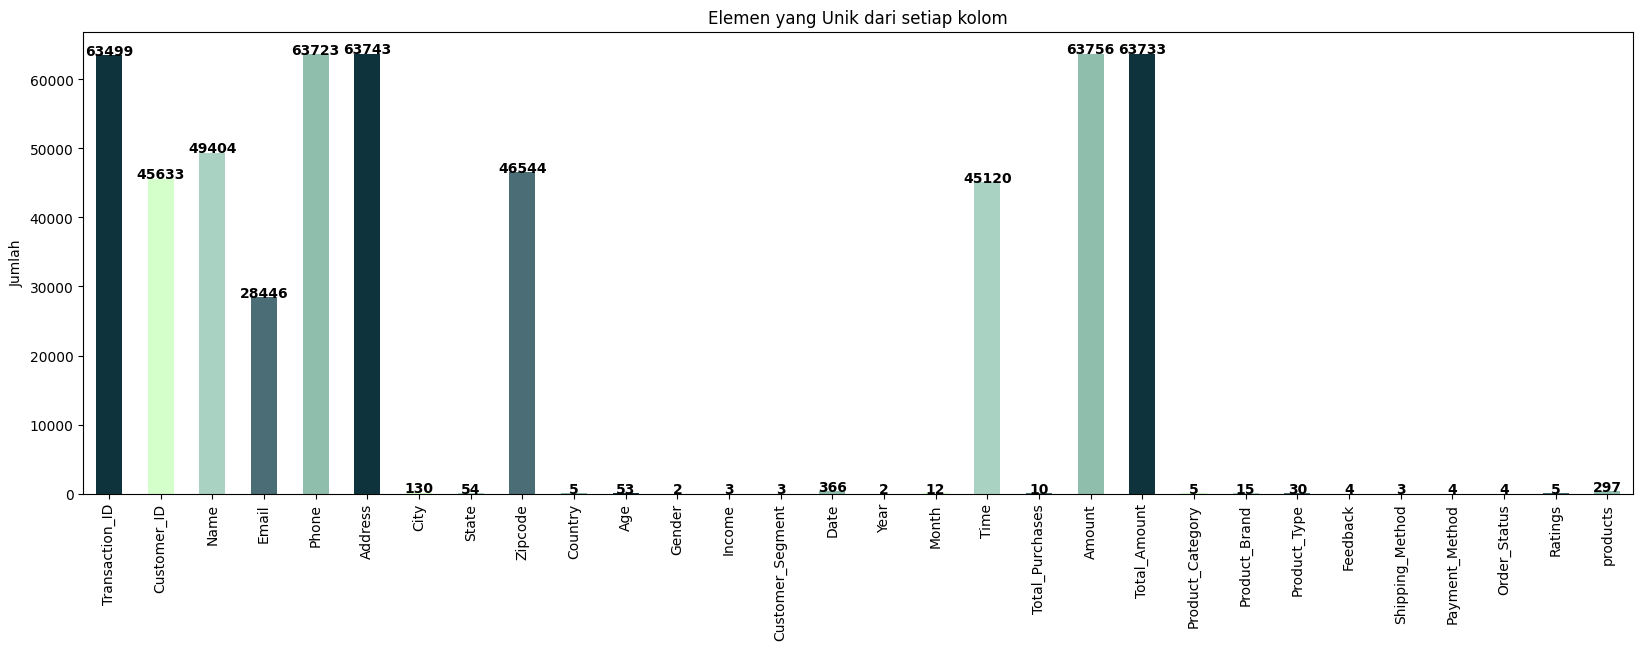

In [12]:
# Checking for unique data such as id, etc.
unik = df.nunique()

plt.figure(figsize=(20, 6))
unik.plot(kind='bar', color=colors)
plt.title('Elemen yang Unik dari setiap kolom')
plt.ylabel('Jumlah')

for i, v in enumerate(unik.values):
    plt.text(i, v+1, str(v), color='black', fontweight='bold', ha='center')

plt.show()

- maybe `products` will not be used because it already exists or it is enough with the variables `Product_Type`, `Product_Brand`, or `Product_Category`. those variables are not **ordinal** they are **nominal**.
- Likewise, the variables `City` and `State` are categorical variables and have quite a lot of unique data and are not **ordinal**.

<a id="1"></a>
# <p style="padding:15px;background-color:#0F333D;margin:0;color:#D4FFCA;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">3. Data Preprocessing</p>

- **Data Wrangling**
    - **Missing Values**
    - **Duplicate**
    - **Inconsisten**
- **Outlier**
- **Feature Engineering**
- **Feature Selection with PCA**

In [13]:
hapus_fitur = ['Name',
               'Email',
               'Phone',
               'Address',
               'Zipcode',
               'Product_Type',
               'products',
               'Product_Brand',
               'City',
               'State']

df2 = df.drop(columns=hapus_fitur)

In [14]:
df2.head(5)

Transaction_ID  Customer_ID    Country   Age  Gender Income  \
0       8691788.0      37249.0    Germany  21.0    Male    Low   
1       2174773.0      69749.0         UK  19.0  Female    Low   
2       6679610.0      30192.0  Australia  48.0    Male    Low   
3       7232460.0      62101.0     Canada  56.0    Male   High   
4       4983775.0      27901.0         UK  22.0    Male    Low   

  Customer_Segment        Date    Year      Month      Time  Total_Purchases  \
0          Regular   9/18/2023  2023.0  September  22:03:55              3.0   
1          Premium  12/31/2023  2023.0   December   8:42:04              2.0   
2          Regular   4/26/2023  2023.0      April   4:06:29              3.0   
3          Premium    05-08-23  2023.0        May  14:55:17              7.0   
4          Premium    01-10-24  2024.0    January  16:54:07              2.0   

       Amount  Total_Amount Product_Category   Feedback Shipping_Method  \
0  108.028757    324.086270         Clothing  Excellent        Same-Day   
1  403.353907    806.707815      Electronics  Excellent        Standard   
2  354.477600   1063.432799            Books    Average        Same-Day   
3  352.407717   2466.854021       Home Decor  Excellent        Standard   
4  124.276524    248.553049          Grocery        Bad        Standard   

  Payment_Method Order_Status  Ratings  
0     Debit Card      Shipped      5.0  
1    Credit Card   Processing      4.0  
2    Credit Card   Processing      2.0  
3         PayPal   Processing      4.0  
4           Cash      Shipped      1.0

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63812 entries, 0 to 63811
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    63746 non-null  float64
 1   Customer_ID       63737 non-null  float64
 2   Country           63775 non-null  object 
 3   Age               63809 non-null  float64
 4   Gender            63730 non-null  object 
 5   Income            63779 non-null  object 
 6   Customer_Segment  63812 non-null  object 
 7   Date              63733 non-null  object 
 8   Year              63748 non-null  float64
 9   Month             63720 non-null  object 
 10  Time              63743 non-null  object 
 11  Total_Purchases   63732 non-null  float64
 12  Amount            63756 non-null  float64
 13  Total_Amount      63733 non-null  float64
 14  Product_Category  63743 non-null  object 
 15  Feedback          63739 non-null  object 
 16  Shipping_Method   63726 non-null  object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

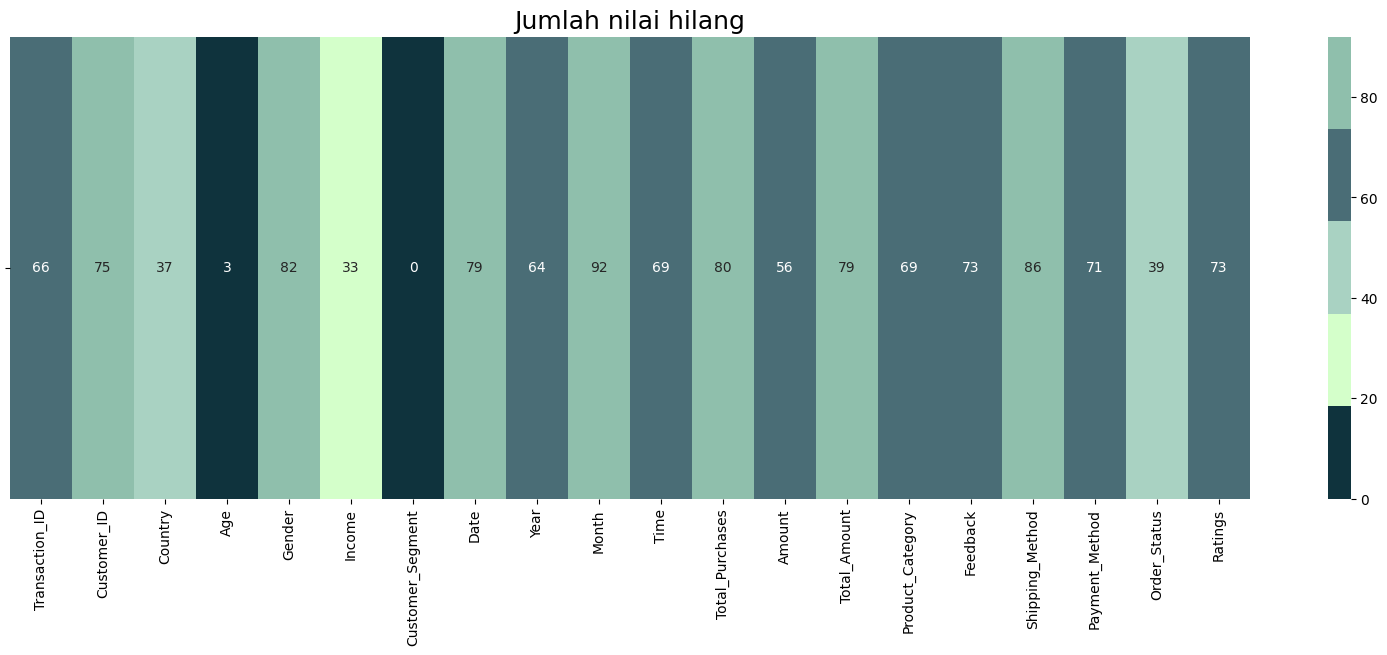

In [16]:
# Missing value
plt.figure(figsize=(20, 6))
sns.heatmap((df2.isna().sum()).to_frame(name='').T,
             cmap=my_palette,
             annot=True,
             fmt='0.0f').set_title('Jumlah nilai hilang', fontsize=18)
plt.show()

In [17]:
df2.shape

(63812, 20)

In [18]:
df2 = df2.dropna()

In [19]:
df2 = df2.drop_duplicates()

In [20]:
df2.shape

(62669, 20)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62669 entries, 0 to 63811
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    62669 non-null  float64
 1   Customer_ID       62669 non-null  float64
 2   Country           62669 non-null  object 
 3   Age               62669 non-null  float64
 4   Gender            62669 non-null  object 
 5   Income            62669 non-null  object 
 6   Customer_Segment  62669 non-null  object 
 7   Date              62669 non-null  object 
 8   Year              62669 non-null  float64
 9   Month             62669 non-null  object 
 10  Time              62669 non-null  object 
 11  Total_Purchases   62669 non-null  float64
 12  Amount            62669 non-null  float64
 13  Total_Amount      62669 non-null  float64
 14  Product_Category  62669 non-null  object 
 15  Feedback          62669 non-null  object 
 16  Shipping_Method   62669 non-null  object 
 17

In [22]:
df2.describe()

Transaction_ID   Customer_ID           Age          Year  \
count    6.266900e+04  62669.000000  62669.000000  62669.000000   
mean     5.494458e+06  55034.598302     21.320493   2023.166861   
std      2.587927e+06  26013.717026      4.671455      0.372855   
min      1.000007e+06  10001.000000     18.000000   2023.000000   
25%      3.252934e+06  32608.000000     20.000000   2023.000000   
50%      5.492419e+06  54966.000000     20.000000   2023.000000   
75%      7.726505e+06  77605.000000     22.000000   2023.000000   
max      9.999995e+06  99998.000000     70.000000   2024.000000   

       Total_Purchases        Amount  Total_Amount       Ratings  
count     62669.000000  62669.000000  62669.000000  62669.000000  
mean          5.382645    255.211226   1375.446146      2.737558  
std           2.875860    140.900101   1131.343979      1.390102  
min           1.000000     10.000219     10.003750      1.000000  
25%           3.000000    133.568625    439.637884      1.000000  
50%           5.000000    255.058853   1049.863242      2.000000  
75%           8.000000    376.788284   2045.563368      4.000000  
max          10.000000    499.966177   4999.625796      5.000000

In [23]:
df2['Date']

0         9/18/2023
1        12/31/2023
2         4/26/2023
3          05-08-23
4          01-10-24
            ...    
63807      12-12-23
63808      05-01-23
63809      08-02-23
63810    12/20/2023
63811    10/27/2023
Name: Date, Length: 62669, dtype: object

In [24]:
print(df2[(df2['Date'].str.contains('13')) & (df2['Date'].str.contains('-'))])

Empty DataFrame
Columns: [Transaction_ID, Customer_ID, Country, Age, Gender, Income, Customer_Segment, Date, Year, Month, Time, Total_Purchases, Amount, Total_Amount, Product_Category, Feedback, Shipping_Method, Payment_Method, Order_Status, Ratings]
Index: []


In the `Date` variable there are two types of data using **'/'** and **'-'**

In [25]:
df2['Date/'] = np.where(df2['Date'].str.contains('/'), df2['Date'], np.nan)
df2['Date-'] = np.where(df2['Date'].str.contains('-'), df2['Date'], np.nan)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df2['Date/'] = pd.to_datetime(df2['Date/'], format='%m/%d/%Y', errors='coerce')

<IPython.core.display.Javascript object>

In [27]:
df2['Date-'] = pd.to_datetime(df2['Date-'], format='%d-%m-%y', errors='coerce')

<IPython.core.display.Javascript object>

In [28]:
df2['Waktu'] = df2['Date-'].fillna(df2['Date/'])

In [29]:
df2['Waktu']

0       2023-09-18
1       2023-12-31
2       2023-04-26
3       2023-08-05
4       2024-10-01
           ...    
63807   2023-12-12
63808   2023-01-05
63809   2023-02-08
63810   2023-12-20
63811   2023-10-27
Name: Waktu, Length: 62669, dtype: datetime64[ns]

In [30]:
df2 = df2.drop(columns=['Date/', 'Date-', 'Date', 'Time'])

In [31]:
df2.head(5)

Transaction_ID  Customer_ID    Country   Age  Gender Income  \
0       8691788.0      37249.0    Germany  21.0    Male    Low   
1       2174773.0      69749.0         UK  19.0  Female    Low   
2       6679610.0      30192.0  Australia  48.0    Male    Low   
3       7232460.0      62101.0     Canada  56.0    Male   High   
4       4983775.0      27901.0         UK  22.0    Male    Low   

  Customer_Segment    Year      Month  Total_Purchases      Amount  \
0          Regular  2023.0  September              3.0  108.028757   
1          Premium  2023.0   December              2.0  403.353907   
2          Regular  2023.0      April              3.0  354.477600   
3          Premium  2023.0        May              7.0  352.407717   
4          Premium  2024.0    January              2.0  124.276524   

   Total_Amount Product_Category   Feedback Shipping_Method Payment_Method  \
0    324.086270         Clothing  Excellent        Same-Day     Debit Card   
1    806.707815      Electronics  Excellent        Standard    Credit Card   
2   1063.432799            Books    Average        Same-Day    Credit Card   
3   2466.854021       Home Decor  Excellent        Standard         PayPal   
4    248.553049          Grocery        Bad        Standard           Cash   

  Order_Status  Ratings      Waktu  
0      Shipped      5.0 2023-09-18  
1   Processing      4.0 2023-12-31  
2   Processing      2.0 2023-04-26  
3   Processing      4.0 2023-08-05  
4      Shipped      1.0 2024-10-01

In [32]:
df2.shape

(62669, 19)

#### Outlier Handling

In [33]:
num_outlier = pd.DataFrame(df2, columns= ['Total_Purchases',
                                           'Amount',
                                           'Total_Amount',
                                           'Ratings',
                                           'Age',
                                           'Year'])

cat_cols = pd.DataFrame(df2, columns= ['Country',
                                        'Gender',
                                        'Income',
                                        'Month',
                                        'Product_Category',
                                        'Feedback',
                                        'Shipping_Method',
                                        'Payment_Method',
                                        'Order_Status'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
def plot_fitur_numerik_boxplots(data, daftar_kolom, baris, kolom, judul):
    
    sns.set_style('darkgrid')
    fig, axs   = plt.subplots(baris, kolom, figsize=(20, 6), sharey=True)
    fig.suptitle(judul, fontsize=25, y=1)
    axs        = axs.flatten()
    df_outlier = pd.DataFrame(columns=['Kolom', 'Indeks_Outlier', 'Nilai_Outlier'])

    for i, kolom in enumerate(daftar_kolom):
        
        sns.boxplot(x=data[kolom], color='#0F333D', ax=axs[i])
        axs[i].set_title(f'{kolom} (skewness: {data[kolom].skew().round(2)})', fontsize=12)

        kuartil_1        = data[kolom].quantile(0.25)
        kuartil_3        = data[kolom].quantile(0.75)
        IQR              = kuartil_3 - kuartil_1
        outlier          = ((data[kolom] < (kuartil_1 - 1.5 * IQR)) | (data[kolom] > (kuartil_3 + 1.5 * IQR)))
        indeks_outlier   = data[outlier].index.tolist()
        nilai_outlier    = data[kolom][outlier].tolist()
        new_row          = pd.DataFrame({'Kolom': [kolom], 'Indeks_Outlier': [indeks_outlier], 'Nilai_Outlier': [nilai_outlier]})
        df_outlier       = pd.concat([df_outlier, new_row], ignore_index=True)
        
        axs[i].plot([], [], 'ro', alpha=0.5, label=f'Outlier: {outlier.sum()}', color='#0F333D')
        axs[i].legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    return df_outlier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

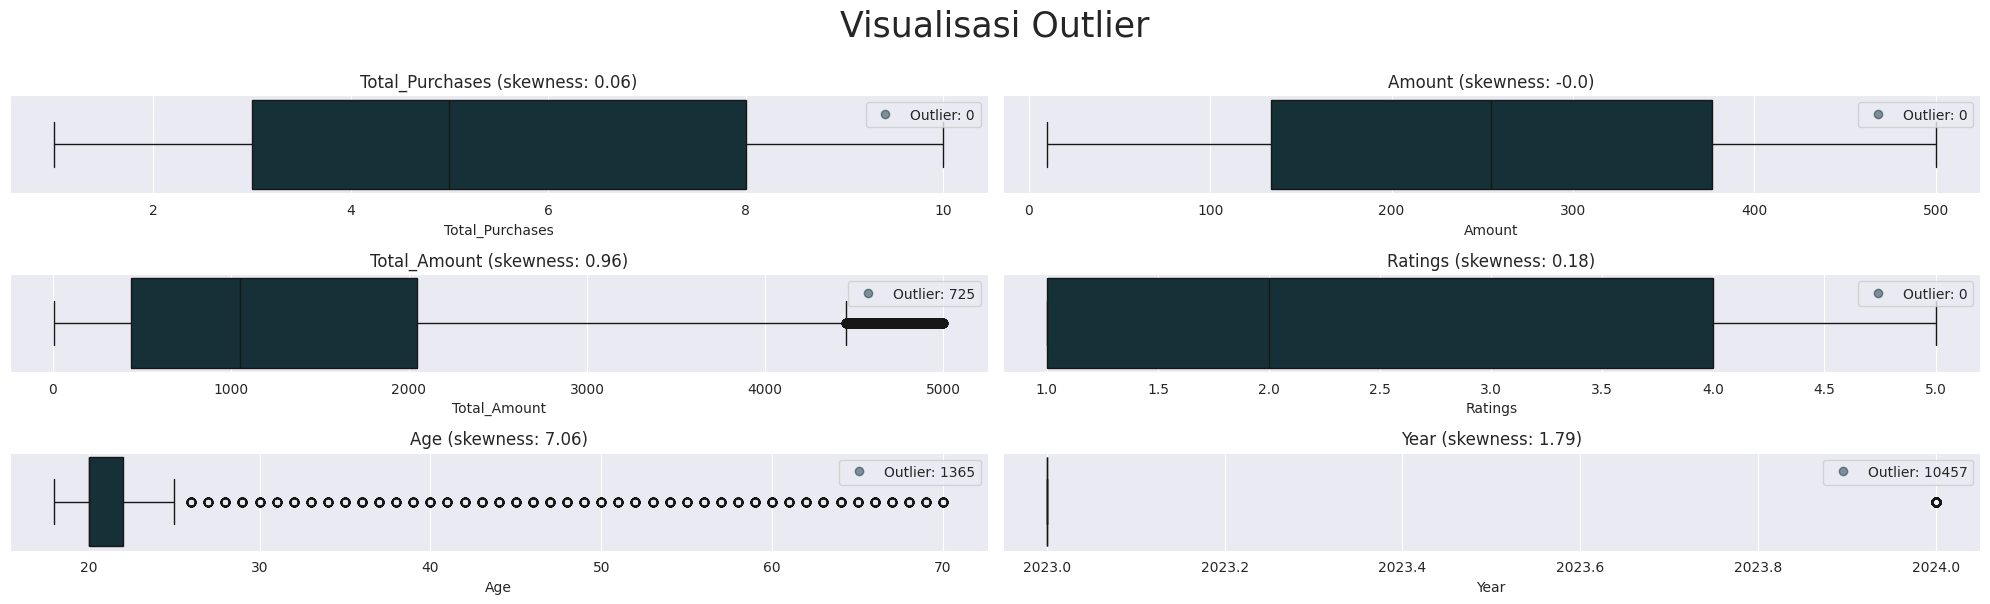

In [35]:
df_outlier = plot_fitur_numerik_boxplots(data=df2,
                                         daftar_kolom=num_outlier,
                                         baris=3,
                                         kolom=2,
                                         judul='Visualisasi Outlier')

In [36]:
df_outlier

Kolom                                     Indeks_Outlier  \
0  Total_Purchases                                                 []   
1           Amount                                                 []   
2     Total_Amount  [150, 159, 395, 400, 484, 494, 722, 729, 780, ...   
3          Ratings                                                 []   
4              Age  [2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,...   
5             Year  [4, 8, 12, 18, 22, 24, 27, 30, 37, 38, 40, 57,...   

                                       Nilai_Outlier  
0                                                 []  
1                                                 []  
2  [4885.287161, 4850.773617, 4487.12769, 4518.67...  
3                                                 []  
4  [48.0, 56.0, 58.0, 29.0, 29.0, 46.0, 64.0, 31....  
5  [2024.0, 2024.0, 2024.0, 2024.0, 2024.0, 2024....

#### `Total_Amount` mengalami outlier

In [37]:
Q1                  = df2['Total_Amount'].quantile(0.25)
Q3                  = df2['Total_Amount'].quantile(0.75)
IQR                 = Q3 - Q1

upper_limit         = Q3 + 1.5 * IQR
lower_limit         = Q1 - 1.5 * IQR

df2['Total_Amount'] = np.where(df2['Total_Amount'] > upper_limit,
                               upper_limit,
                               np.where(df2['Total_Amount'] < lower_limit,
                                        lower_limit,
                                        df2['Total_Amount']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

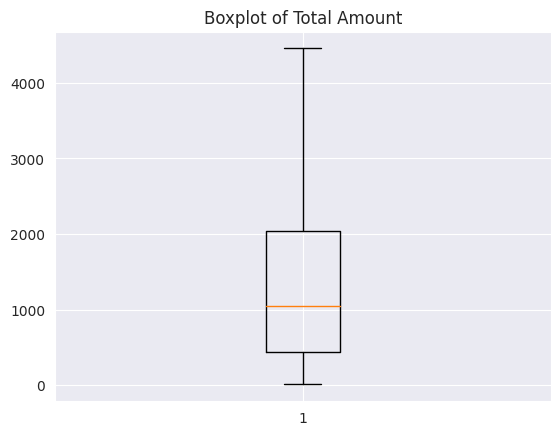

In [38]:
plt.boxplot(df2['Total_Amount'])
plt.title('Boxplot of Total Amount')
plt.show()

In [39]:
df2['Year'] = df2['Year'].astype(int)

In [40]:
num_outlier2 = ['Total_Purchases',
               'Amount',
               'Total_Amount',
               'Ratings',
               'Age',
               'Year']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

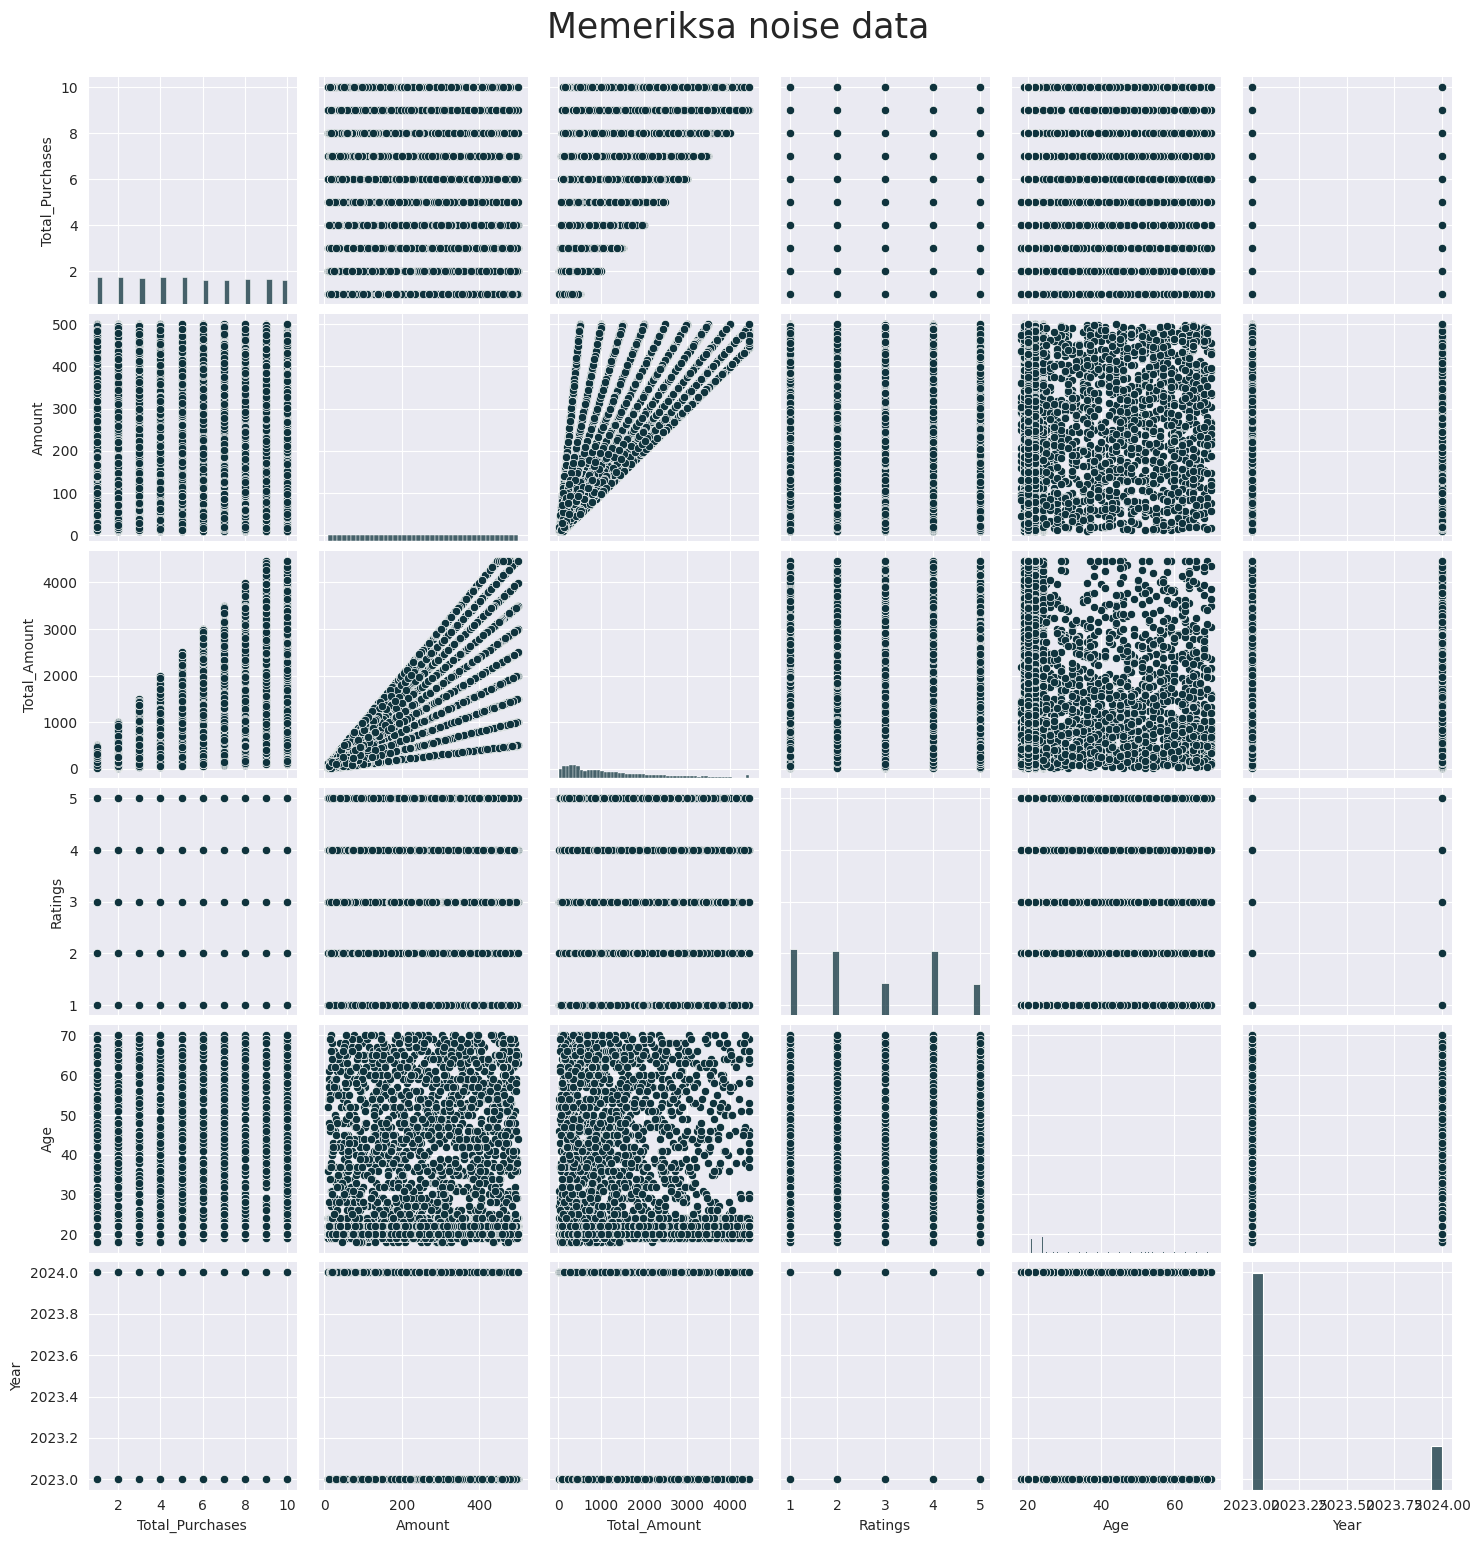

In [41]:
sns.set_style('darkgrid')
sns.set_palette(colors)
sns.pairplot(df2[num_outlier2])
plt.suptitle('Memeriksa noise data', y=1.03, fontsize=25)
plt.show()

There seems to be a lot of numerical data that seems to have an order or level, and then there is also numerical data that has a lot of distribution. This is probably because the only continuous numeric variables are the `Amount` and `Total_Amount` variables which have a linear relationship.

### Data Visualization / EDA

#### Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

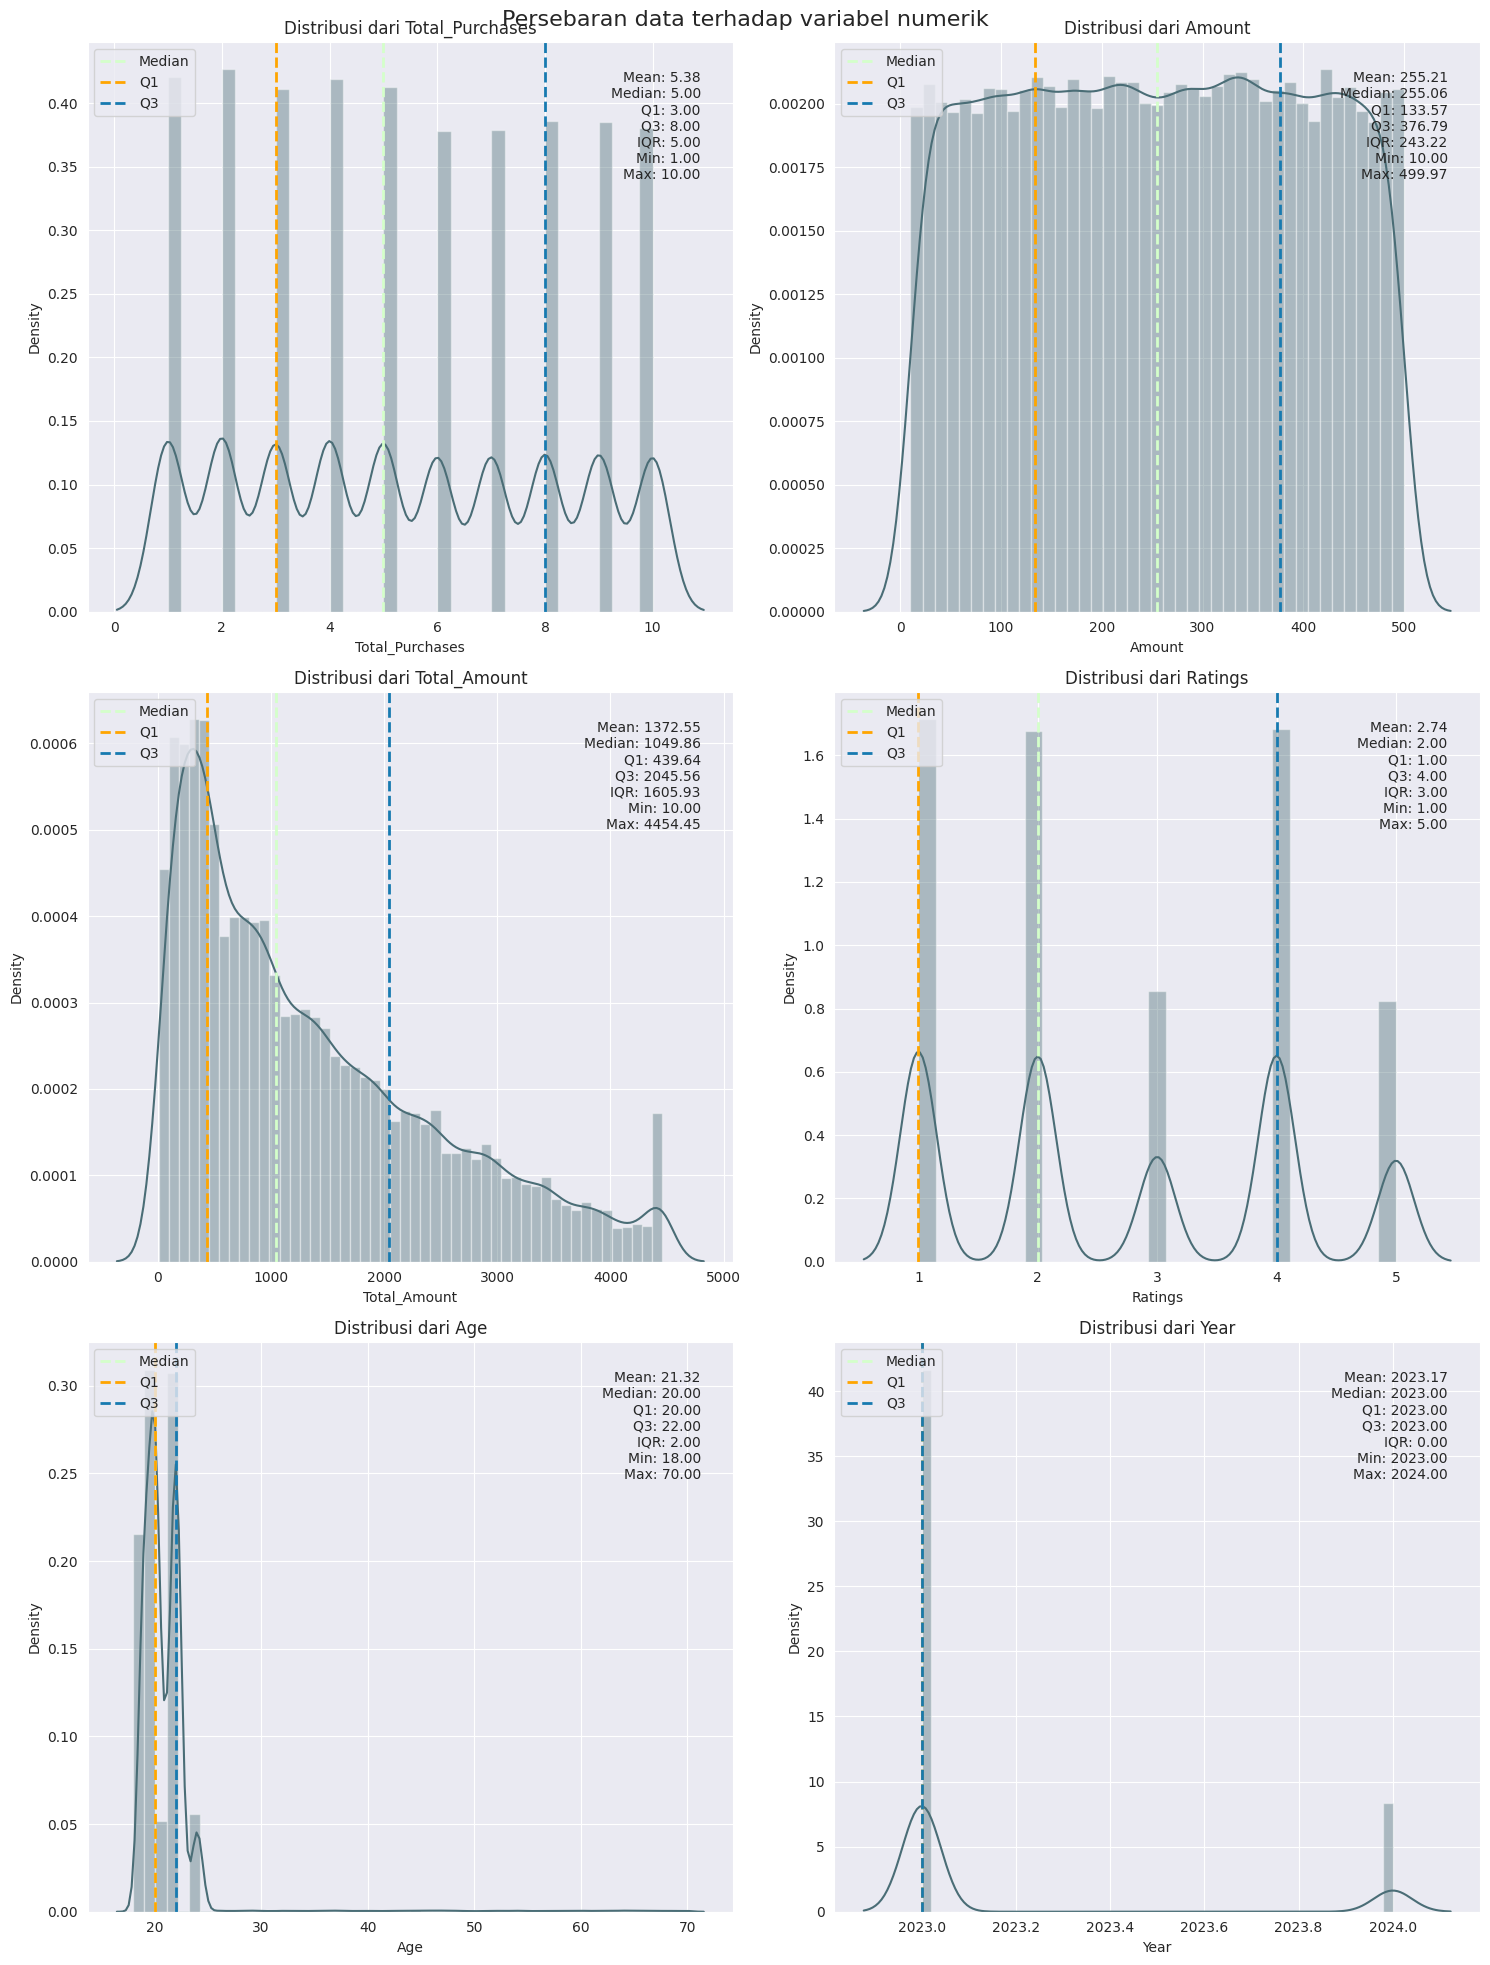

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

warna = ["#4A6D76"]

for i, column in enumerate(num_outlier2):
    sns.distplot(df2[column], color=warna[i%1], ax=axes[i//2, i%2])

    axes[i//2, i%2].axvline(x=df2[column].median(),
                            color='#D4FFCA',
                            linestyle='--',
                            linewidth=2,
                            label='Median')

    axes[i//2, i%2].axvline(x=df2[column].quantile(0.25),
                            color='orange',
                            linestyle='--',
                            linewidth=2,
                            label='Q1')

    axes[i//2, i%2].axvline(x=df2[column].quantile(0.75),
                            color='#177ab0',
                            linestyle='--',
                            linewidth=2,
                            label='Q3')

    median = df2[column].median()
    q1     = df2[column].quantile(0.25)
    q3     = df2[column].quantile(0.75)
    iqr    = q3 - q1

    axes[i//2, i%2].text(0.95, 0.95,
                          'Mean: {:.2f}\nMedian: {:.2f}\nQ1: {:.2f}\nQ3: {:.2f}\nIQR: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
                              df2[column].mean(), median, q1, q3, iqr, df2[column].min(), df2[column].max()),
                          transform=axes[i//2, i%2].transAxes,
                          fontsize=10, va='top', ha='right')

    axes[i//2, i%2].legend(loc = "upper left")

    axes[i//2, i%2].set_title('Distribusi dari '+ column)

fig.suptitle('Persebaran data terhadap variabel numerik', fontsize=16)
fig.tight_layout()

The `Amount` variable seems to have a normal distribution, but still needs scaling. While `Total_Amount` has skewness so it needs scaling.

In [43]:
df2

Transaction_ID  Customer_ID    Country   Age  Gender  Income  \
0           8691788.0      37249.0    Germany  21.0    Male     Low   
1           2174773.0      69749.0         UK  19.0  Female     Low   
2           6679610.0      30192.0  Australia  48.0    Male     Low   
3           7232460.0      62101.0     Canada  56.0    Male    High   
4           4983775.0      27901.0         UK  22.0    Male     Low   
...               ...          ...        ...   ...     ...     ...   
63807       9188371.0      27052.0    Germany  20.0    Male  Medium   
63808       4731811.0      13110.0    Germany  20.0    Male     Low   
63809       2191186.0      78280.0  Australia  20.0    Male    High   
63810       6545007.0      76002.0    Germany  20.0    Male     Low   
63811       3175779.0      65515.0         UK  20.0    Male  Medium   

      Customer_Segment  Year      Month  Total_Purchases      Amount  \
0              Regular  2023  September              3.0  108.028757   
1              Premium  2023   December              2.0  403.353907   
2              Regular  2023      April              3.0  354.477600   
3              Premium  2023        May              7.0  352.407717   
4              Premium  2024    January              2.0  124.276524   
...                ...   ...        ...              ...         ...   
63807              New  2023   December              9.0  224.449175   
63808              New  2023        May              2.0  207.569522   
63809              New  2023     August             10.0  405.545823   
63810              New  2023   December              8.0  292.668338   
63811              New  2023    October              2.0  221.811812   

       Total_Amount Product_Category   Feedback Shipping_Method  \
0        324.086270         Clothing  Excellent        Same-Day   
1        806.707815      Electronics  Excellent        Standard   
2       1063.432799            Books    Average        Same-Day   
3       2466.854021       Home Decor  Excellent        Standard   
4        248.553049          Grocery        Bad        Standard   
...             ...              ...        ...             ...   
63807   2020.042575         Clothing       Good         Express   
63808    415.139044      Electronics        Bad        Standard   
63809   4055.458230          Grocery    Average         Express   
63810   2341.346704      Electronics        Bad        Standard   
63811    443.623624      Electronics       Good        Standard   

      Payment_Method Order_Status  Ratings      Waktu  
0         Debit Card      Shipped      5.0 2023-09-18  
1        Credit Card   Processing      4.0 2023-12-31  
2        Credit Card   Processing      2.0 2023-04-26  
3             PayPal   Processing      4.0 2023-08-05  
4               Cash      Shipped      1.0 2024-10-01  
...              ...          ...      ...        ...  
63807     Debit Card   Processing      3.0 2023-12-12  
63808           Cash   Processing      1.0 2023-01-05  
63809    Credit Card      Pending      2.0 2023-02-08  
63810    Credit Card      Pending      1.0 2023-12-20  
63811         PayPal    Delivered      4.0 2023-10-27  

[62669 rows x 19 columns]

In [44]:
unik2 = df2.nunique()
unik2

Transaction_ID      62434
Customer_ID         45101
Country                 5
Age                    53
Gender                  2
Income                  3
Customer_Segment        3
Year                    2
Month                  12
Total_Purchases        10
Amount              62669
Total_Amount        61945
Product_Category        5
Feedback                4
Shipping_Method         3
Payment_Method          4
Order_Status            4
Ratings                 5
Waktu                 366
dtype: int64

In [45]:
df2['Waktu'].value_counts()

Waktu
2023-09-21    218
2023-05-28    208
2024-02-16    206
2024-03-02    206
2023-10-11    206
             ... 
2023-04-12    142
2023-11-13    140
2023-07-18    139
2023-10-08    136
2023-07-29    130
Name: count, Length: 366, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Rata-rata Biaya Belanja Total Untuk Setiap Negara')

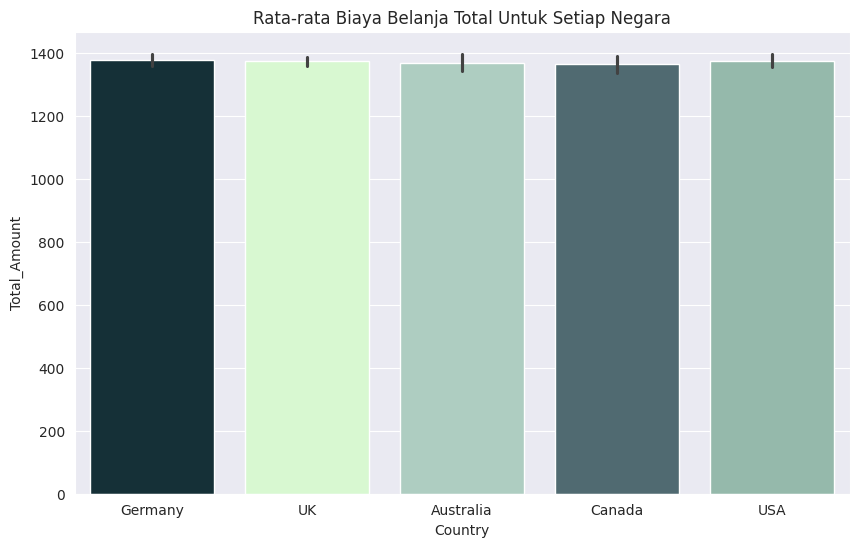

In [46]:
# Rata-rata Total_Amount berdasarkan Country

plt.figure(figsize=(10, 6))

sns.barplot(data=df2,
            x='Country',
            y='Total_Amount',
            estimator=lambda x: sum(x) / len(x),
            palette=colors)

plt.title('Rata-rata Biaya Belanja Total Untuk Setiap Negara')

1. It looks like each country has the same average value when it comes to total customer spending.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

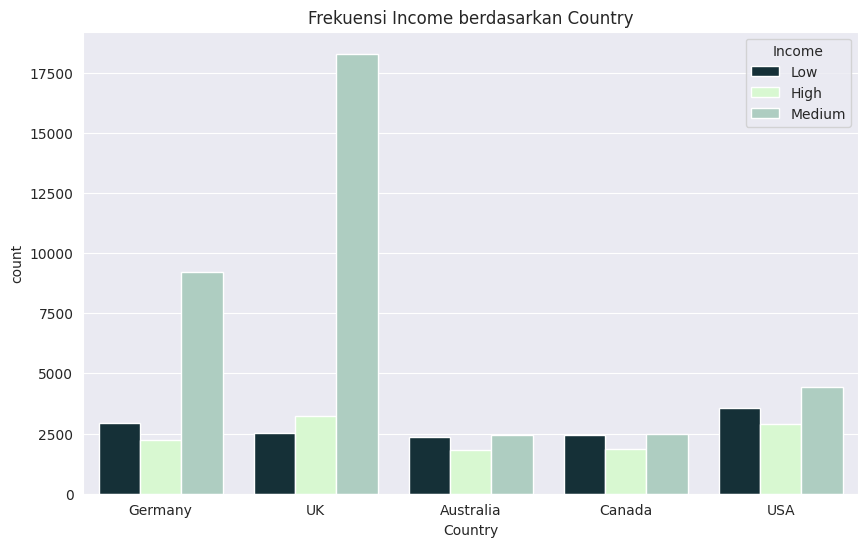

In [47]:
# Frekuensi pendapatan untuk setiap negara
plt.figure(figsize=(10, 6))

sns.countplot(data=df2,
              x='Country',
              hue='Income',
              palette=colors)

plt.title('Frekuensi Income berdasarkan Country')
plt.show()

2. `Country` UK has the highest average of customers with incomes around the 'Medium' class, followed by `Country` Germany. While `Country` Australia, Canada, and USA seem to have a similar number of customers with similar incomes.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

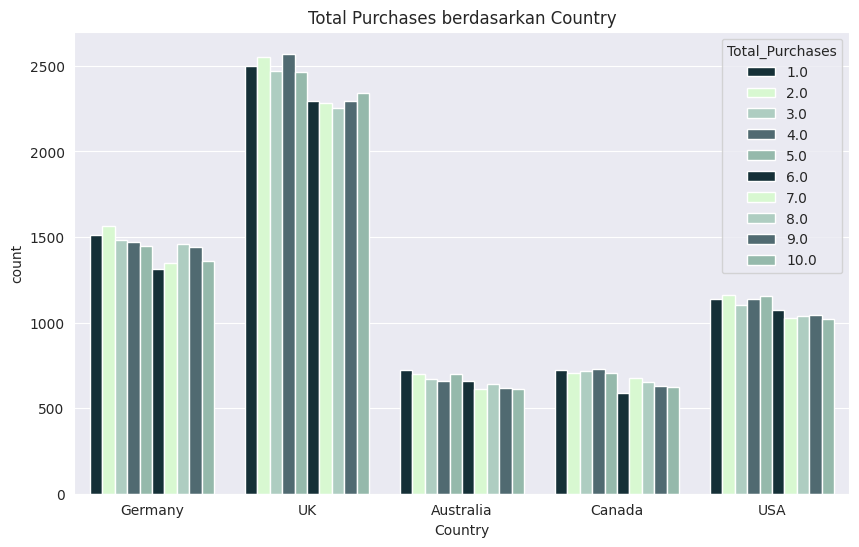

In [48]:
# Rata-rata pelanggan belanja di setiap negara

plt.figure(figsize=(10, 6))

sns.countplot(data=df2,
            x='Country',
            hue='Total_Purchases',
            palette=colors)

plt.title('Total Purchases berdasarkan Country')
plt.show()

5. The UK seems to be the place where customers make the most transactions. This is evidenced by the large number of customers who make transactions with 1 to 10 products. This is followed by Germany.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

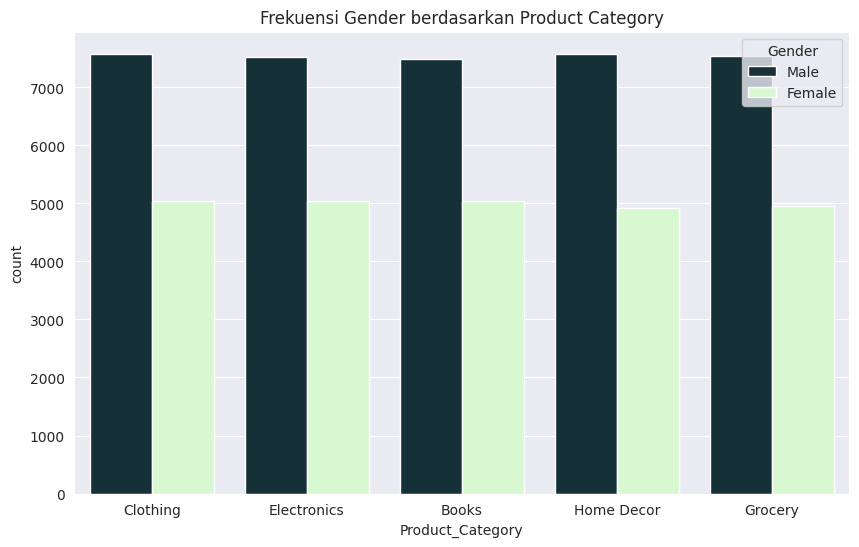

In [49]:
# Jumlah gender untuk setiap belanja produk

plt.figure(figsize=(10, 6))

sns.countplot(data=df2,
              x='Product_Category',
              hue='Gender',
              palette=colors)

plt.title('Frekuensi Gender berdasarkan Product Category')
plt.show()

6. In each `Product_Category` the proportion of `Gender` who shop at this company seems to be dominated by 'Male'. It is proven that the proportion of Male has 33% more than Female.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

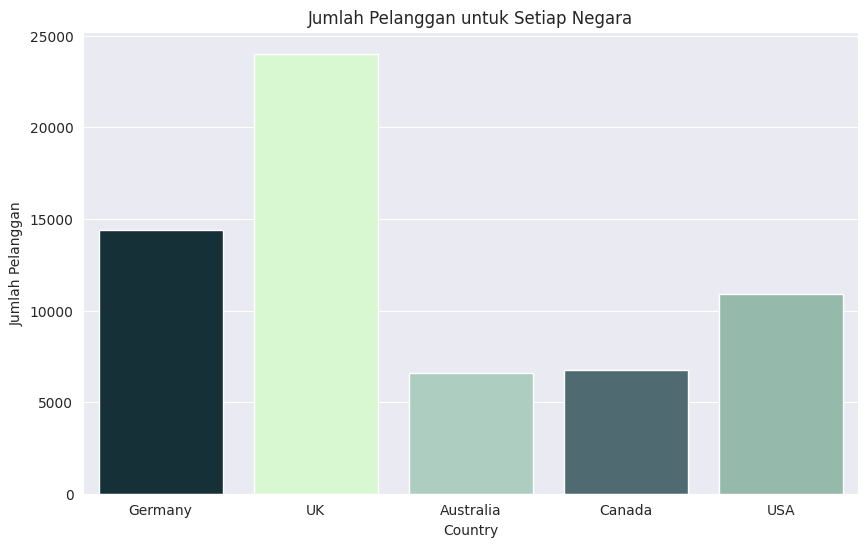

In [50]:
# jumlah pelanggan tiap negara
plt.figure(figsize=(10, 6))

sns.countplot(data=df2,
              x='Country',
              palette=colors)

plt.title('Jumlah Pelanggan untuk Setiap Negara')
plt.ylabel('Jumlah Pelanggan')
plt.show()

7. Based on the previous univariate analysis, it can be proven that `Country` UK has the most number of customers followed by Germany, USA, Canada, and Australia.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

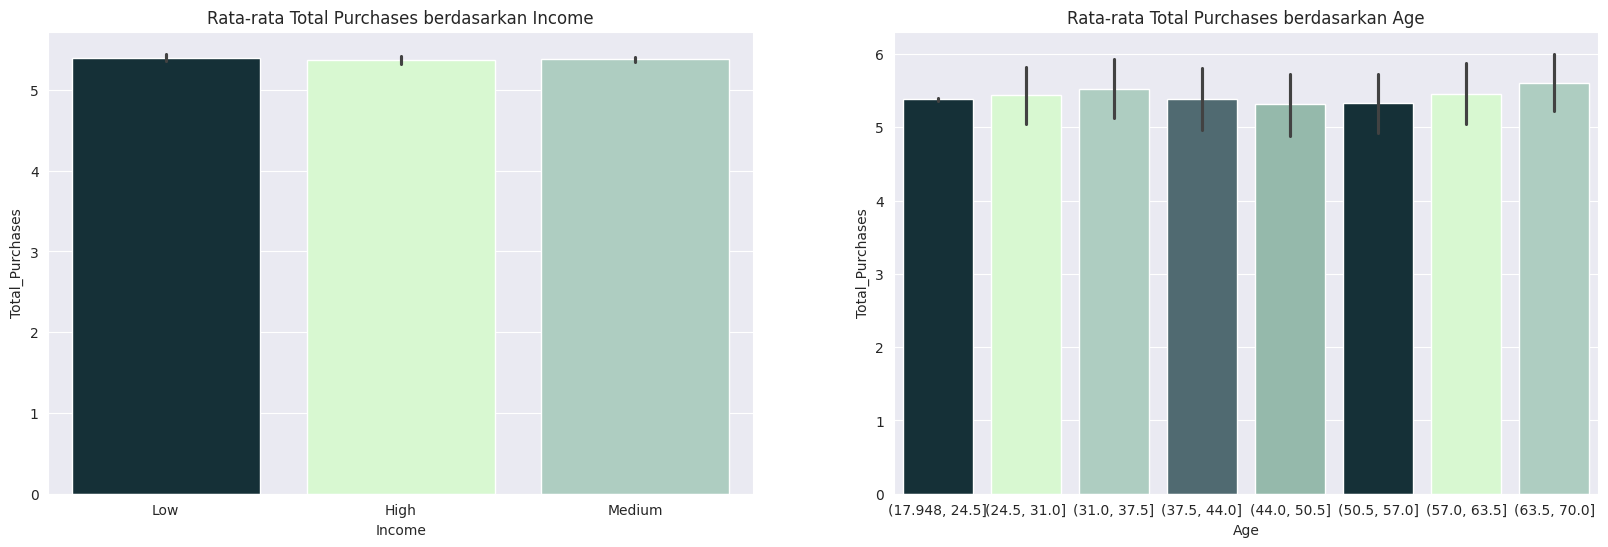

In [51]:
# rata-rata total belanja terhadap kelas pendapatan dan umur
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(data=df2,
            x='Income',
            y='Total_Purchases',
            estimator=lambda x: sum(x) / len(x),
            palette=colors,
            ax=axes[0])

axes[0].set_title('Rata-rata Total Purchases berdasarkan Income')

sns.barplot(data=df2,
            x=pd.cut(df2['Age'], bins=8),
            y='Total_Purchases',
            estimator=lambda x: sum(x) / len(x),
            palette=colors,
            ax=axes[1])

axes[1].set_title('Rata-rata Total Purchases berdasarkan Age')

plt.show()

8. It seems that the distribution of the average Total Products Purchased / `Total Purchases` of customers against Income and Age has an even distribution. Where customers typically buy 5 products at any income class, and also customers can be of any age.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

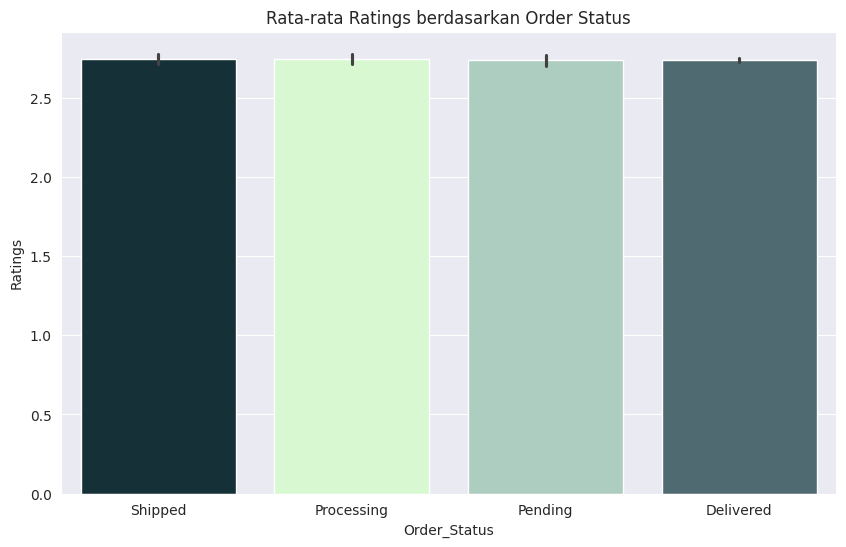

In [52]:
# Rata-rata rating pelanggan untuk setiap status pemesanan produk

plt.figure(figsize=(10, 6))
sns.barplot(data=df2,
            x='Order_Status',
            y='Ratings',
            estimator=lambda x: sum(x) / len(x),
            palette=colors)

plt.title('Rata-rata Ratings berdasarkan Order Status')
plt.show()

In [53]:
df2['Ratings'].value_counts()

Ratings
1.0    15907
4.0    15615
2.0    15556
3.0     7937
5.0     7654
Name: count, dtype: int64

9. The average user rating of each product ordering process is around 2.5, so the results are not very good for the company.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

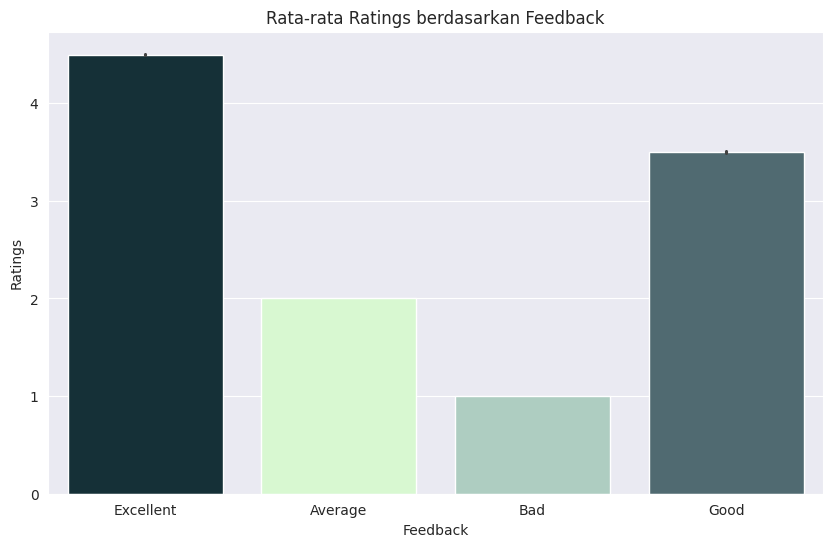

In [54]:
# Rata-rata rating pelanggan berdasarkan feedback

plt.figure(figsize=(10, 6))

sns.barplot(data=df2,
            x='Feedback',
            y='Ratings',
            estimator=lambda x: sum(x) / len(x),
            palette=colors)

plt.title('Rata-rata Ratings berdasarkan Feedback')
plt.show()

10. This is evidenced by the `Feedbaack` given by users against each `Ratings`. Feedback with 'Average' is at Ratings 2.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

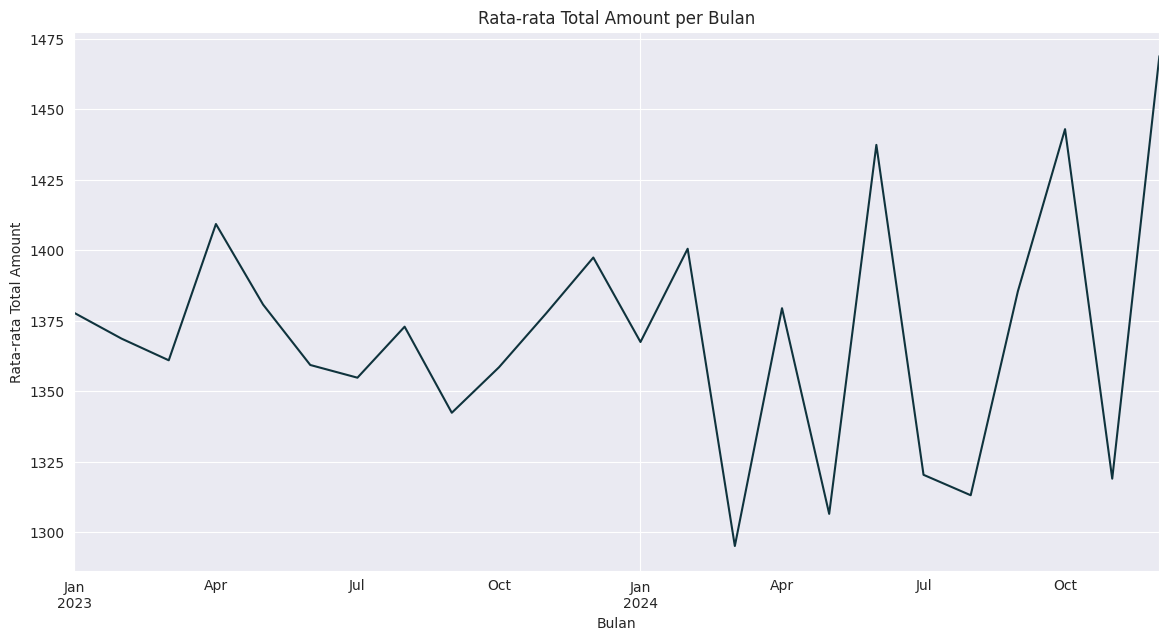

In [55]:
# Rata-rata total belanja pelanggan tiap bulannya

df2.set_index('Waktu', inplace=True)

total_belanja_bulanan = df2['Total_Amount'].resample('M').mean()


plt.figure(figsize=(14, 7))
total_belanja_bulanan.plot()
plt.title('Rata-rata Total Amount per Bulan')
plt.ylabel('Rata-rata Total Amount')
plt.xlabel('Bulan')
plt.grid(True)
plt.show()

11. The average total expenditure incurred by customers in these two years i.e. 2023 to 2024 had the highest increase in October 2024.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

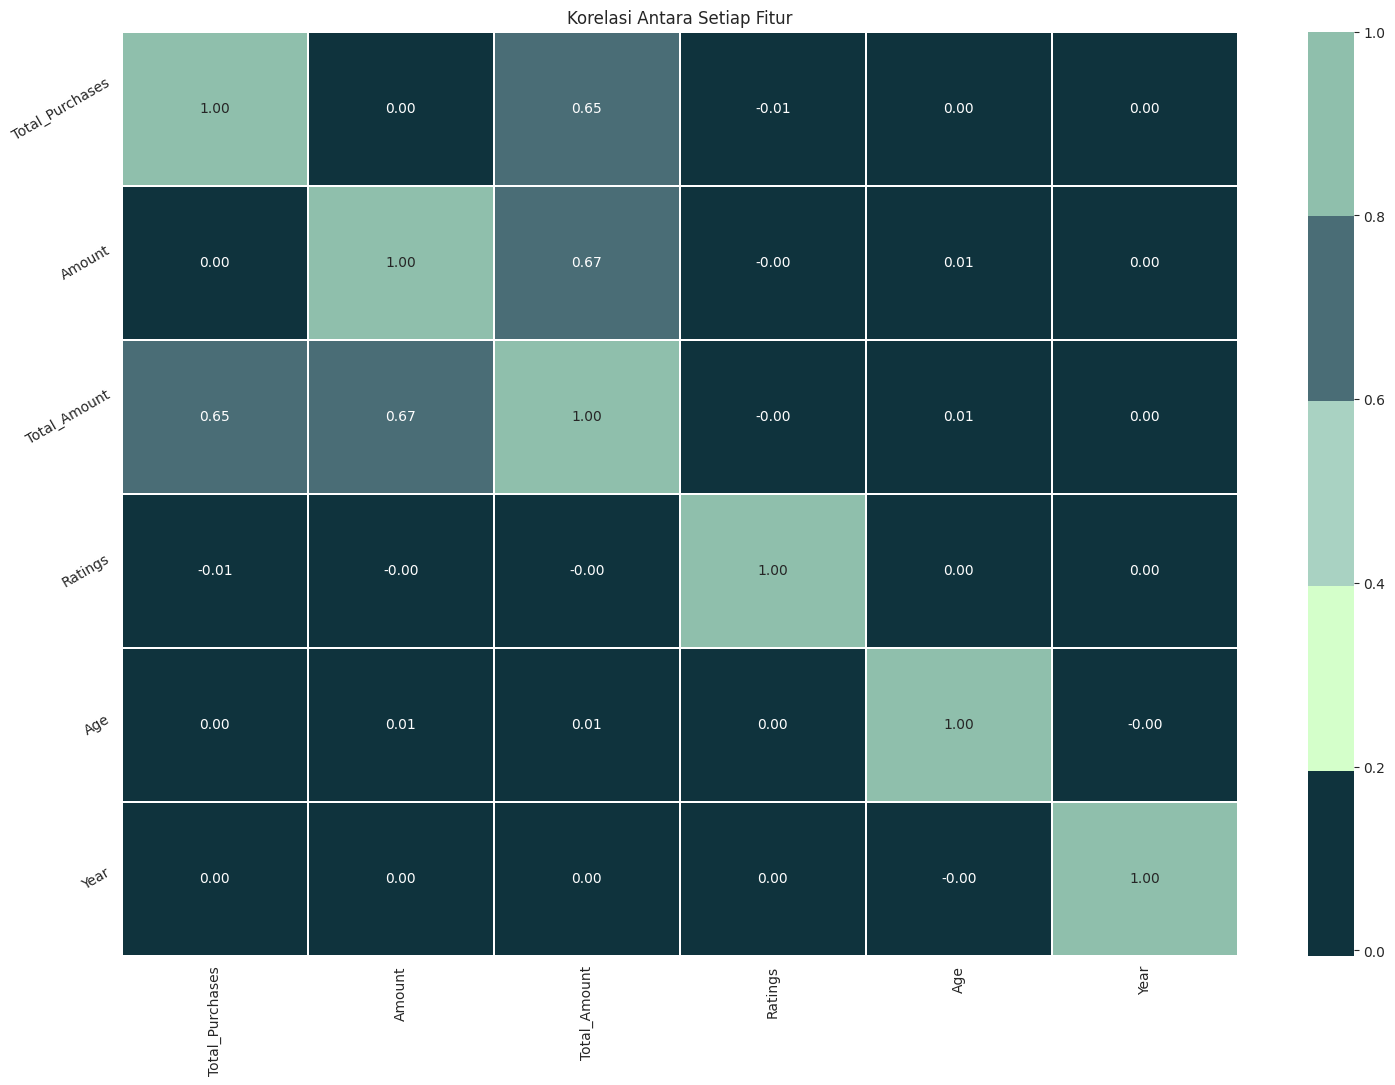

In [56]:
# Correlation between the features
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Korelasi Antara Setiap Fitur')

a = sns.heatmap(df2[num_outlier2].corr(),
                annot = True,
                cmap =cmap,
                fmt='.2f',
                linewidths=0.2)

a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

The correlation coefficient value (R value) which ranges from 0.3 to 0.7 is usually considered a correlation with a moderate indication and does not experience Multicollinearity. Meanwhile, if the correlation coefficient value is more than 0.7, it has a strong correlation. Then if the coefficient value is more than 0.9 or 0.95 then the correlation may experience Multicollinearity.

- The `Total_Amount` variable and the `Total_Purchase` variable have a correlation coefficient value of **0.65** which indicates that they have a **positive** relationship. Likewise, the correlation between `Total_Amount` and `Amount` is **0.67** and has a **positive** relationship.

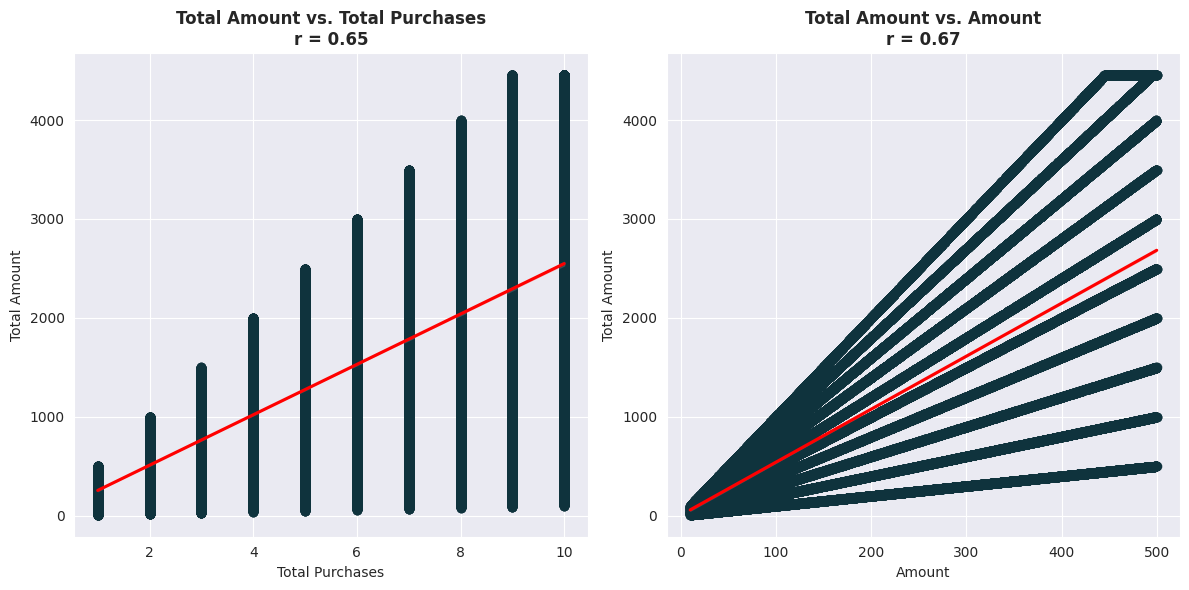

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot 1
sns.regplot(x='Total_Purchases', y='Total_Amount', data=df2, ax=axes[0], line_kws={'color':'red'})
r, p = pearsonr(df2['Total_Purchases'], df2['Total_Amount'])
axes[0].set_title('Total Amount vs. Total Purchases\nr = {:.2f}'.format(r), fontsize=12, fontweight='bold')
axes[0].set_xlabel('Total Purchases')
axes[0].set_ylabel('Total Amount')

# plot 2
sns.regplot(x='Amount', y='Total_Amount', data=df2, ax=axes[1], line_kws={'color':'red'})
r, p = pearsonr(df2['Amount'], df2['Total_Amount'])
axes[1].set_title('Total Amount vs. Amount\nr = {:.2f}'.format(r), fontsize=12, fontweight='bold')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Total Amount')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()

- In the first and second plot, we can see a positive correlation between Total Amount with Total Purchases and also with Amount. As Total Purchases and Amount increases, Total Amount also increases.

<a id="1"></a>
# <p style="padding:15px;background-color:#0F333D;margin:0;color:#D4FFCA;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">4. Modeling</p>

In [58]:
df2.reset_index(inplace=True)
df2.rename(columns={'index': 'Waktu'}, inplace=True)

In [59]:
df2.head(5)

Waktu  Transaction_ID  Customer_ID    Country   Age  Gender Income  \
0 2023-09-18       8691788.0      37249.0    Germany  21.0    Male    Low   
1 2023-12-31       2174773.0      69749.0         UK  19.0  Female    Low   
2 2023-04-26       6679610.0      30192.0  Australia  48.0    Male    Low   
3 2023-08-05       7232460.0      62101.0     Canada  56.0    Male   High   
4 2024-10-01       4983775.0      27901.0         UK  22.0    Male    Low   

  Customer_Segment  Year      Month  Total_Purchases      Amount  \
0          Regular  2023  September              3.0  108.028757   
1          Premium  2023   December              2.0  403.353907   
2          Regular  2023      April              3.0  354.477600   
3          Premium  2023        May              7.0  352.407717   
4          Premium  2024    January              2.0  124.276524   

   Total_Amount Product_Category   Feedback Shipping_Method Payment_Method  \
0    324.086270         Clothing  Excellent        Same-Day     Debit Card   
1    806.707815      Electronics  Excellent        Standard    Credit Card   
2   1063.432799            Books    Average        Same-Day    Credit Card   
3   2466.854021       Home Decor  Excellent        Standard         PayPal   
4    248.553049          Grocery        Bad        Standard           Cash   

  Order_Status  Ratings  
0      Shipped      5.0  
1   Processing      4.0  
2   Processing      2.0  
3   Processing      4.0  
4      Shipped      1.0

#### PCA
It seems that we don't need to apply **PCA**. This is because we will segment customers using RFMT which will use only a few variables, namely Customer_ID, Transaction_ID, Total_Amount, and Time. So there are not too many dimensions when applied to **Clustering** later.

### RFMT (Recency, Frequency, Monetary, Tenure)
1. Recency (R): Indicates how recently the customer made the last transaction. number of days since last transaction

2. Frequency (F): Measures how often customers make transactions in a certain period of time. the number of transactions made by each customer.

3. Monetary (M): Measures how much total money is spent by customers. Sum up the total expenditure (Total_Amount) by each customer.

4. Tenure (T): time or days after the first transaction

In [60]:
# Metrics RFMT

# satu hari setelah tanggal transaksi terakhir
snapshot_date        =  df2['Waktu'].max() + timedelta(days=1)

rfmt = df2.groupby('Customer_ID').agg(
    recency          = ('Waktu', lambda x: (snapshot_date - x.max()).days),
    frequency        = ('Transaction_ID', 'count'),
    monetary_value   = ('Total_Amount', 'sum'),
    tenure           = ('Waktu', lambda x: (snapshot_date - x.min()).days),
    total_products   = ('Total_Purchases', 'sum'),
    ratings          = ('Ratings', 'sum'))

rfmt.dropna(inplace=True)

rfmt              = rfmt[rfmt['monetary_value'] > 0] # hanya menyimpan nilai moneter yang bukan nol

In [61]:
rfmt

recency  frequency  monetary_value  tenure  total_products  \
Customer_ID                                                               
10001.0          629          1      367.457739     629             3.0   
10002.0          475          1      503.282836     475             6.0   
10007.0          306          1     1968.318905     306             7.0   
10009.0          399          1       49.274554     399             1.0   
10010.0          436          2     1921.447432     449            12.0   
...              ...        ...             ...     ...             ...   
99984.0          449          2     1095.493440     480             4.0   
99989.0          245          3      207.277246     524             7.0   
99994.0          345          3     7077.622614     699            25.0   
99995.0          539          1      166.183753     539             4.0   
99998.0          276          1      463.866247     276             6.0   

             ratings  
Customer_ID           
10001.0          1.0  
10002.0          1.0  
10007.0          4.0  
10009.0          5.0  
10010.0          8.0  
...              ...  
99984.0          9.0  
99989.0          7.0  
99994.0          7.0  
99995.0          2.0  
99998.0          1.0  

[45101 rows x 6 columns]

In [62]:
rfmt['frequency'].value_counts()

frequency
1    31127
2    10948
3     2527
4      436
5       57
6        6
Name: count, dtype: int64

In [63]:
rfmt.columns

Index(['recency', 'frequency', 'monetary_value', 'tenure', 'total_products',
       'ratings'],
      dtype='object')

In [64]:
def histogram_rfmt(df):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    df.hist('recency',
            bins=10,
            color="#0F333D",
            ax=axes[0, 0])
    axes[0, 0].set_title('Recency')

    df.hist('frequency',
            bins=4,
            color="#D4FFCA",
            ax=axes[0, 1])
    axes[0, 1].set_title('Frequency')

    df.hist('monetary_value',
            bins=100,
            color="#A9D2C2",
            ax=axes[0, 2])
    axes[0, 2].set_title('Monetary Value')

    df.hist('tenure',
            bins=10,
            color="#4A6D76",
            ax=axes[1, 0])
    axes[1, 0].set_title('Tenure')

    df.hist('total_products',
            bins=10,
            color="#FF5733",
            ax=axes[1, 1])
    axes[1, 1].set_title('Total Products')

    df.hist('ratings',
            bins=10,
            color="#FFC300",
            ax=axes[1, 2])
    axes[1, 2].set_title('Ratings')

    plt.tight_layout()
    plt.show()

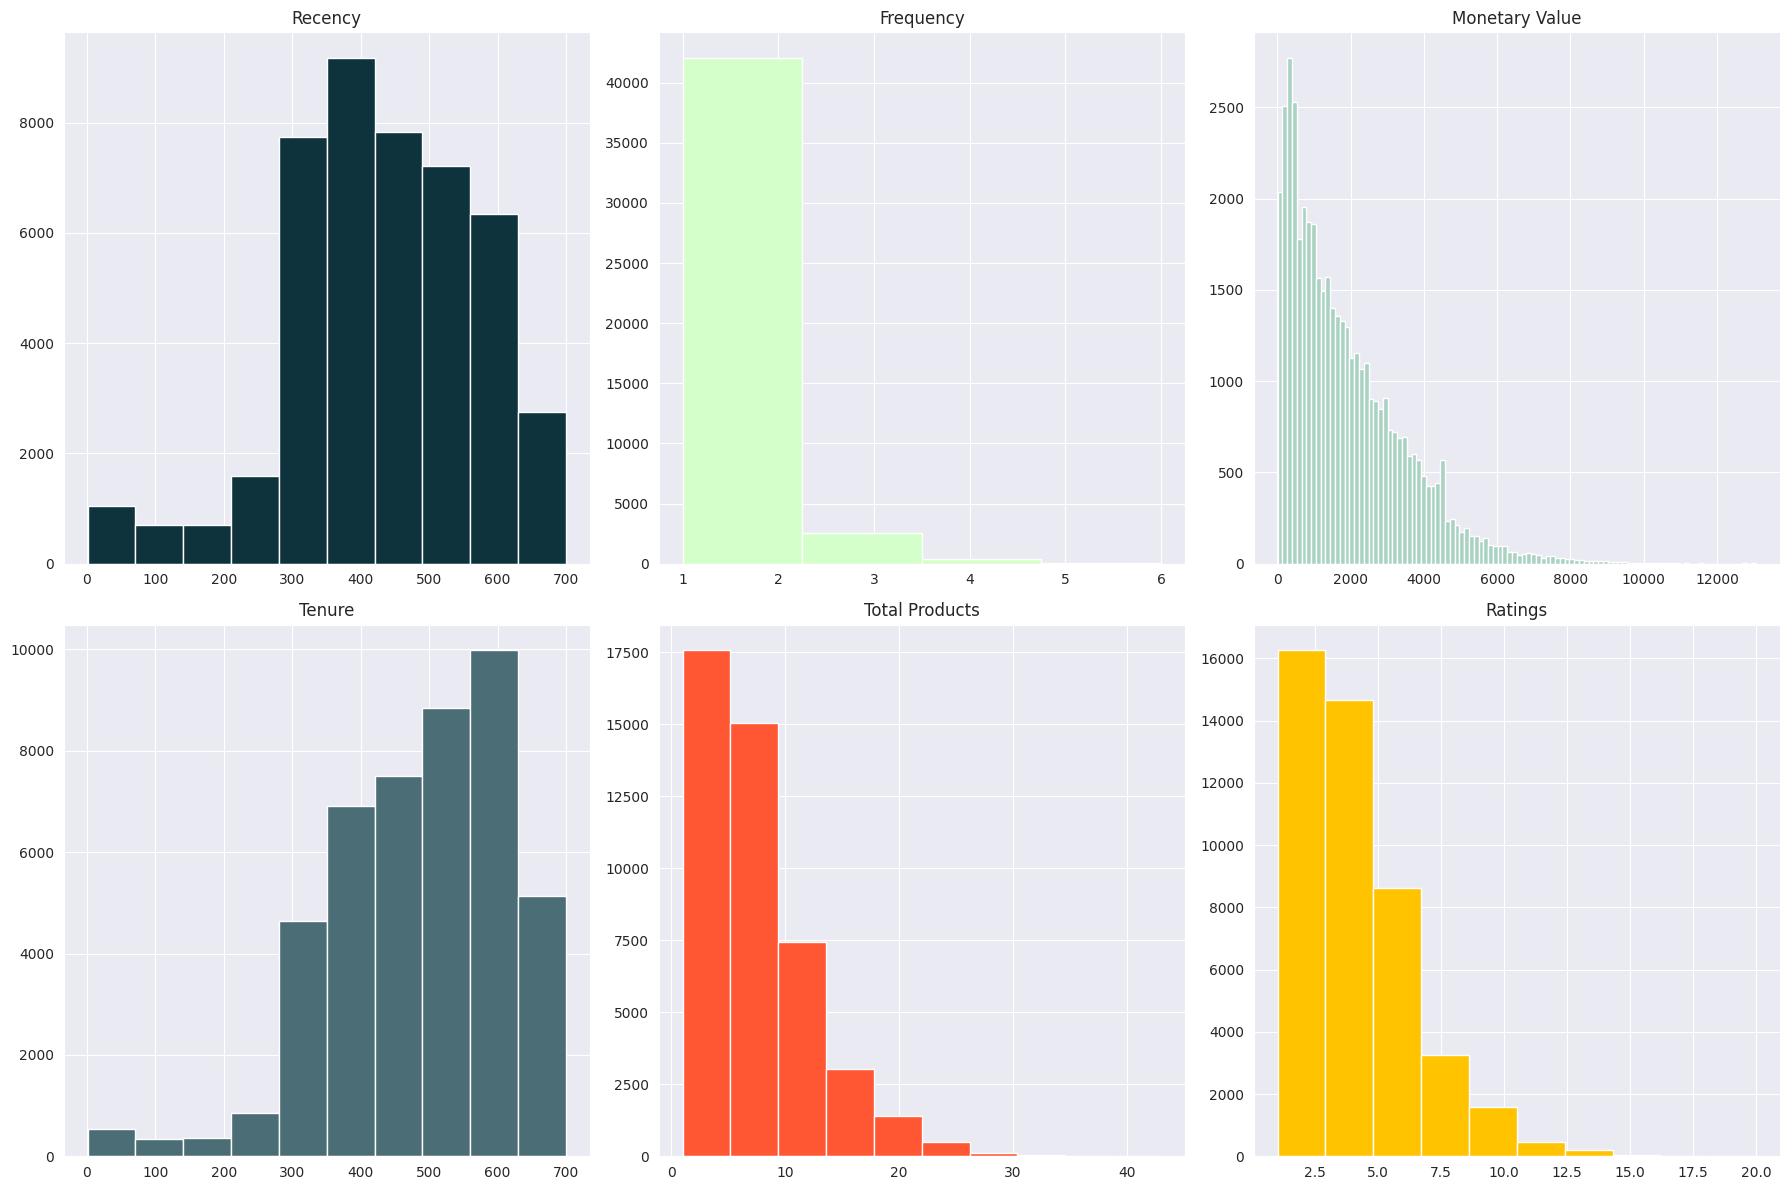

In [65]:
histogram_rfmt(rfmt)

Every variable on RFMT seems are skewed right and left.

#### Transformasi or Scaling using Box-Cox Technique
The Box-Cox method is a power transformation technique used to transform non-normal data into normal data. The method involves finding the optimal power transformation parameter (λ) that makes the data as normal as possible.

Y = (X^λ - 1) / λ

where:

- Y is the transformed data
- X is the original data
-  (lambda) is the transformation parameter

The Box-Cox transformation works by finding the optimal value of λ that makes the data as normal as possible:
- Estimate λ: The first step is to estimate the value of λ using a maximum likelihood estimation method.
- Apply the transformation: Once λ is estimated, apply the transformation formula to the original data X.
- Check for normality: After transformation, check if the data Y follows a normal distribution using statistical tests (e.g., Shapiro-Wilk test) and visual inspections (e.g., histograms, Q-Q plots).



In [66]:
def boxcox(x):
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox

In [67]:
rfmt_boxcox = rfmt.apply(boxcox, axis=0)

In [68]:
rfmt_boxcox

recency  frequency  monetary_value        tenure  \
Customer_ID                                                         
10001.0      2334.082031   0.000000       16.899954  13429.415128   
10002.0      1649.139128   0.000000       18.960826   8708.770021   
10007.0       957.131997   0.000000       30.632211   4419.748365   
10009.0      1329.167095   0.000000        7.571118   6655.277322   
10010.0      1483.296486   0.284457       30.380242   7984.540983   
...                  ...        ...             ...           ...   
99984.0      1538.202820   0.284457       25.009170   8850.563940   
99989.0       726.888545   0.311200       13.627449  10132.568734   
99994.0      1110.298309   0.311200       47.114985  15802.888187   
99995.0      1928.254628   0.000000       12.511878  10583.392567   
99998.0       842.389079   0.000000       18.407036   3769.419456   

             total_products   ratings  
Customer_ID                            
10001.0            1.351840  0.000000  
10002.0            2.530314  0.000000  
10007.0            2.835501  1.601073  
10009.0            0.000000  1.903560  
10010.0            4.048465  2.587333  
...                     ...       ...  
99984.0            1.805025  2.769159  
99989.0            2.835501  2.386388  
99994.0            6.135556  2.386388  
99995.0            1.805025  0.744295  
99998.0            2.530314  0.000000  

[45101 rows x 6 columns]

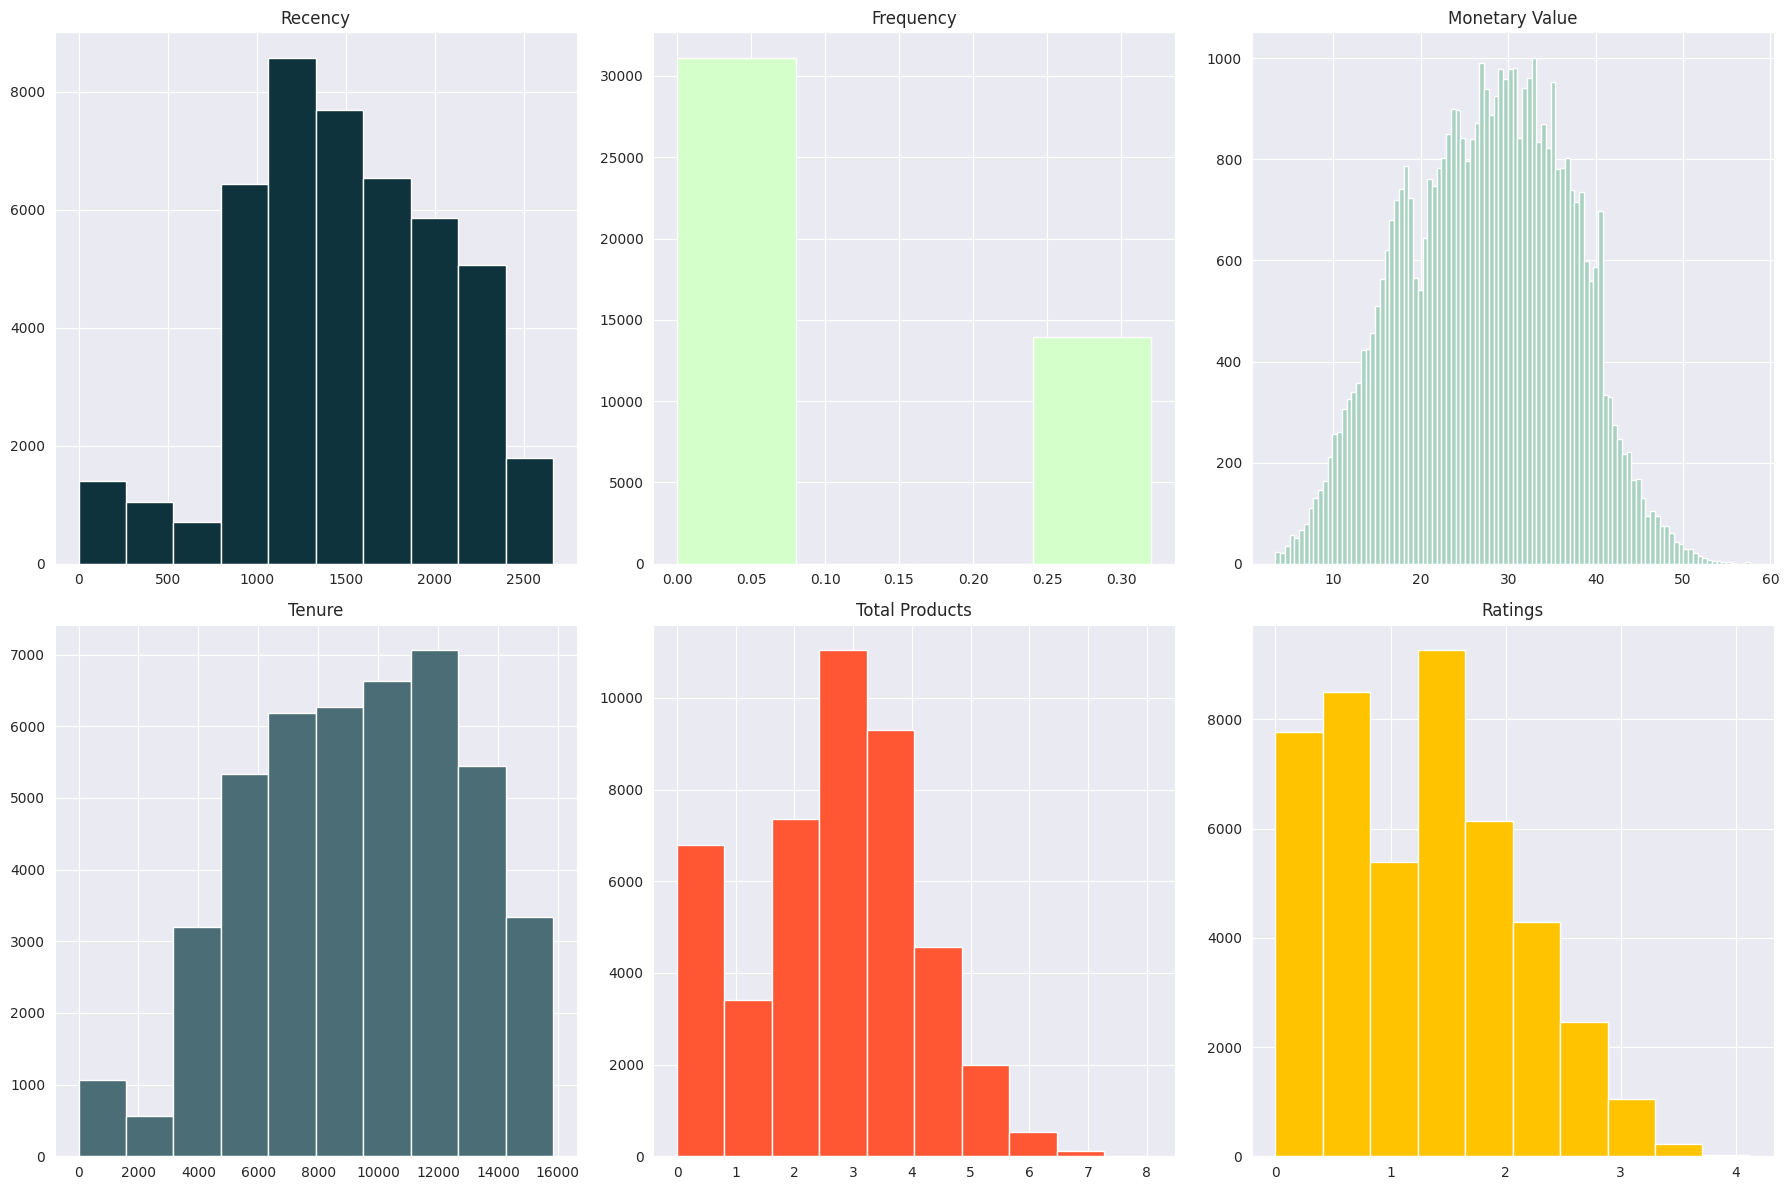

In [69]:
histogram_rfmt(rfmt_boxcox)

In [70]:
rfmt_boxcox['frequency'].value_counts()

frequency
0.000000    31127
0.284457    10948
0.311200     2527
0.317458      436
0.319624       57
0.320560        6
Name: count, dtype: int64

Box cox-transformed variables are less skewed, though frequency remains skewed because most values are 1.

### Scaling

In [71]:
scaler      = StandardScaler()

<IPython.core.display.Javascript object>

In [72]:
scaler.fit(rfmt_boxcox)

StandardScaler()

In [73]:
rfmt_scaled    = scaler.transform(rfmt_boxcox)

rfmt_scaled_df = pd.DataFrame(data    = rfmt_scaled,
                              index   = rfmt_boxcox.index,
                              columns = rfmt_boxcox.columns)

rfmt_scaled_df.agg(['mean','std']).round()

<IPython.core.display.Javascript object>

recency  frequency  monetary_value  tenure  total_products  ratings
mean      0.0        0.0             0.0     0.0            -0.0      0.0
std       1.0        1.0             1.0     1.0             1.0      1.0

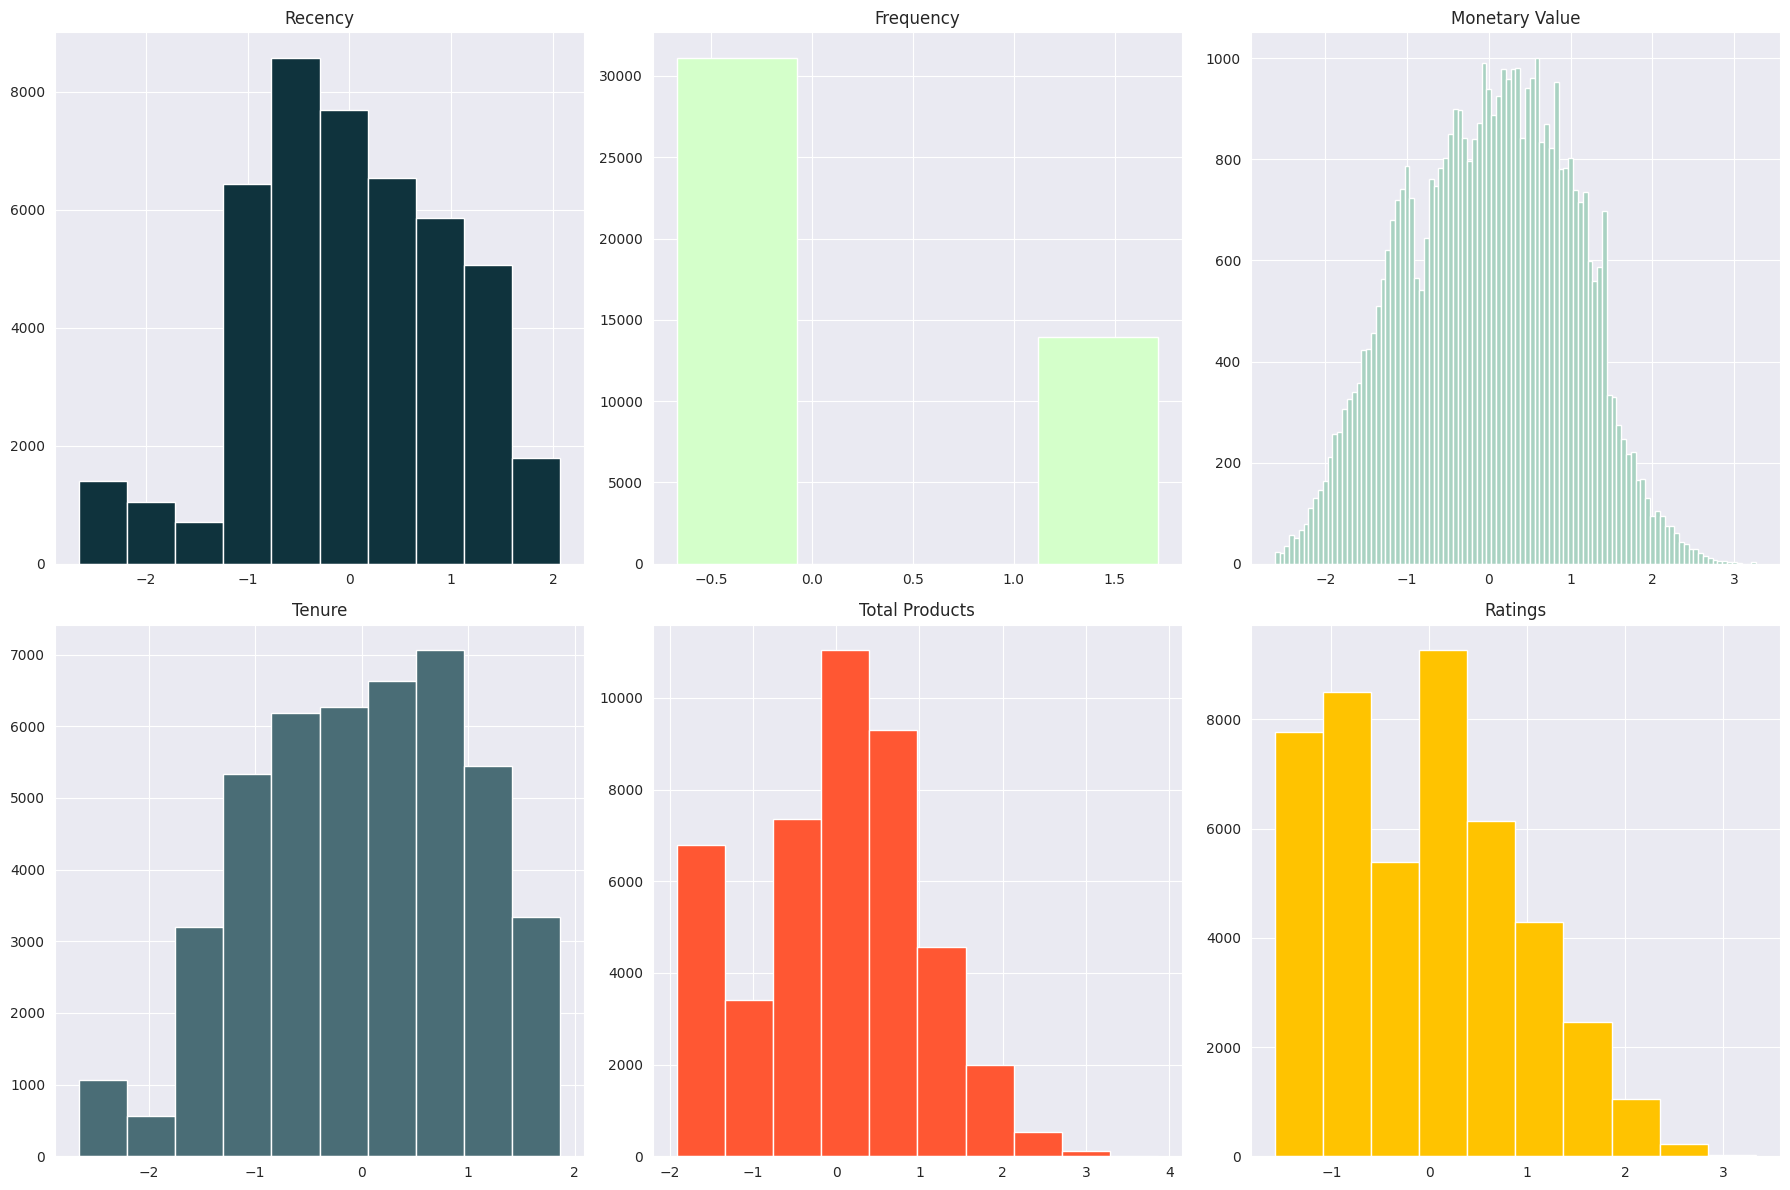

In [74]:
histogram_rfmt(rfmt_scaled_df)

Now scaling is success with standardscaler(). We move into **Clustering**

#### Using K-Means Clustering Because the data is kinda good, not to much noise and outlier

In [75]:
rfmt_scaled_df.head(5)

recency  frequency  monetary_value    tenure  total_products  \
Customer_ID                                                                  
10001.0      1.484004  -0.669265       -1.150613  1.176883       -0.945654   
10002.0      0.269022  -0.669265       -0.927355 -0.170021       -0.102970   
10007.0     -0.958491  -0.669265        0.337030 -1.393773        0.115258   
10009.0     -0.298558  -0.669265       -2.161225 -0.755927       -1.912306   
10010.0     -0.025157   1.445982        0.309734 -0.376659        0.982605   

              ratings  
Customer_ID            
10001.0     -1.579384  
10002.0     -1.579384  
10007.0      0.329400  
10009.0      0.690022  
10010.0      1.505210

#### Find best K values with Elbow Method

In [76]:
kmeans_params = {"init": "random",
                 "n_init": 10,
                 "max_iter": 300,
                 "random_state": 1,
                 "tol": 1e-4,
                 "verbose": 0}

In [77]:
inertia_values = []

for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, **kmeans_params)
    kmeans.fit(rfmt_scaled_df)
    inertia_values.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It involves plotting the within-cluster sum of squares against the number of clusters and identifying the "elbow" point where the rate of decrease in the sum of squares slows down.

In [78]:
inertia_values

[270605.9999999988,
 173491.3818768746,
 130135.57843077046,
 113940.39873315097,
 103177.30865909773,
 93602.0245046673,
 87372.37851124263,
 81855.48035696395,
 76116.54143124589,
 72673.92068174647]

In [79]:
def optimasi_k_elbow(inertia_values, name):
    """ mencari nilai k optimal
        inertias (list): list that has inertia for each selected k
        name (string): name of clustering algorithm
    """

    # mencoba dari k 1 - 11
    kl = KneeLocator(range(1,11),
                     inertia_values,
                     curve='convex',
                     direction="decreasing")

    plt.style.use("fivethirtyeight")

    sns.lineplot(x=range(1,11),
                 y=inertia_values,
                 color=colors[0],
                 linewidth=3)

    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20, fontsize=12)
    plt.ylabel("Inertia", labelpad=20, fontsize=12)
    plt.title(f"Elbow Method for {name}", y=1.09, fontsize=14)

    plt.axvline(x=kl.elbow,
                color= 'grey',
                label='Elbow',
                ls='--',
                linewidth=3)

    plt.legend()
    plt.tight_layout()
    plt.show()

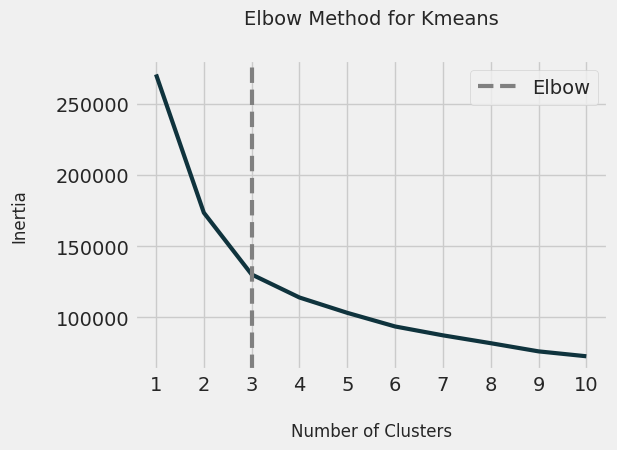

In [80]:
optimasi_k_elbow(inertia_values, 'Kmeans')

Seems like number of clusters with 3 is the optimun. But i need to make sure ok.

<a id="1"></a>
# <p style="padding:15px;background-color:#0F333D;margin:0;color:#D4FFCA;font-family:Verdana,sans-serif;font-size:9-0%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:900">5. Evaluation</p>

#### Evaluate the efficacy of our clustering approach.

1. **Silhouette Coefficient**
The Silhouette Coefficient measures how similar objects within a cluster (cohesion) are compared to objects in other clusters (separation). Its value ranges between -1 and 1.
    - For each data point, calculate the average distance between that point and all other points in the same cluster (a).
    - Calculate the average distance between that point and all points in the nearest different cluster (b).
    - The Silhouette Coefficient for that point is calculated as: \((b - a) / \max(a, b)\).
    
A value close to 1 indicates that the point is in the correct cluster. A value close to -1 indicates that the point may fit better in another cluster. A value close to 0 indicates that the point is on the boundary of two clusters.


2. **Calinski-Harabasz Coefficient**
The Calinski-Harabasz Coefficient, also known as the Variance Ratio Criterion, measures the ratio between the total amount of inter-cluster variance and the total amount of intra-cluster variance. The higher the value, the better the clustering quality.
    - Calculate the sum of inter-cluster variances: the difference between the centroid of each cluster and the overall centroid.
    - Calculate the total intra-cluster variance: the difference between each point in a cluster and its cluster centroid.
    - Calinski-Harabasz Coefficient is the ratio of the total amount of inter-cluster variance to the total amount of intra-cluster variance, multiplied by an adjustment factor based on the number of clusters and the number of data points.

In [122]:
# Calculating coefficient silhoute dan calinski harabasz

silhouette_coef = []
calinski_harabasz_coef = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(rfmt_scaled_df)
    score = silhouette_score(rfmt_scaled_df, kmeans.labels_)
    silhouette_coef.append(score)

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(rfmt_scaled_df)
    score = calinski_harabasz_score(rfmt_scaled_df, kmeans.labels_)
    calinski_harabasz_coef.append(score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
# Create a dataframe to store the scores
scores_kmeans = pd.DataFrame({'k': range(2,11),
'Silhouette Score': silhouette_coef,
'Calinski-Harabasz Score': calinski_harabasz_coef})

# Find the best k for each score
best_k_silhouette = scores_kmeans.loc[scores_kmeans['Silhouette Score'].idxmax(), 'k']
best_k_calinski_harabaz = scores_kmeans.loc[scores_kmeans['Calinski-Harabasz Score'].idxmax(), 'k']

<IPython.core.display.Javascript object>

In [124]:
print("Skor kedua evaluasi nilai k dari hasil clustering:")
scores_kmeans.style.set_properties(**{'font-family': 'Segoe UI'}).hide(axis='index')

Skor kedua evaluasi nilai k dari hasil clustering:


In [125]:
def grafik_evaluasi_plot_k(sh_score, ch_score, name, x=range(2,11)):

    fig, ax = plt.subplots(1,2,figsize=(15,7), dpi=100)

    ax[0].plot(x,
               sh_score,
               color=colors[0],
               marker='o',
               ms=9,
               mfc=colors[-1])

    ax[1].plot(x,
               ch_score,
               color=colors[0],
               marker='o',
               ms=9,
               mfc=colors[-1])

    ax[0].set_xlabel("Number of Clusters", labelpad=20)
    ax[0].set_ylabel("Silhouette Coefficient", labelpad=20)
    ax[1].set_xlabel("Number of Clusters", labelpad=20)
    ax[1].set_ylabel("calinski Harabasz Coefficient", labelpad=20)
    plt.suptitle(f'Evaluate {name} Clustering',y=0.9)
    plt.tight_layout(pad=3)
    plt.show()

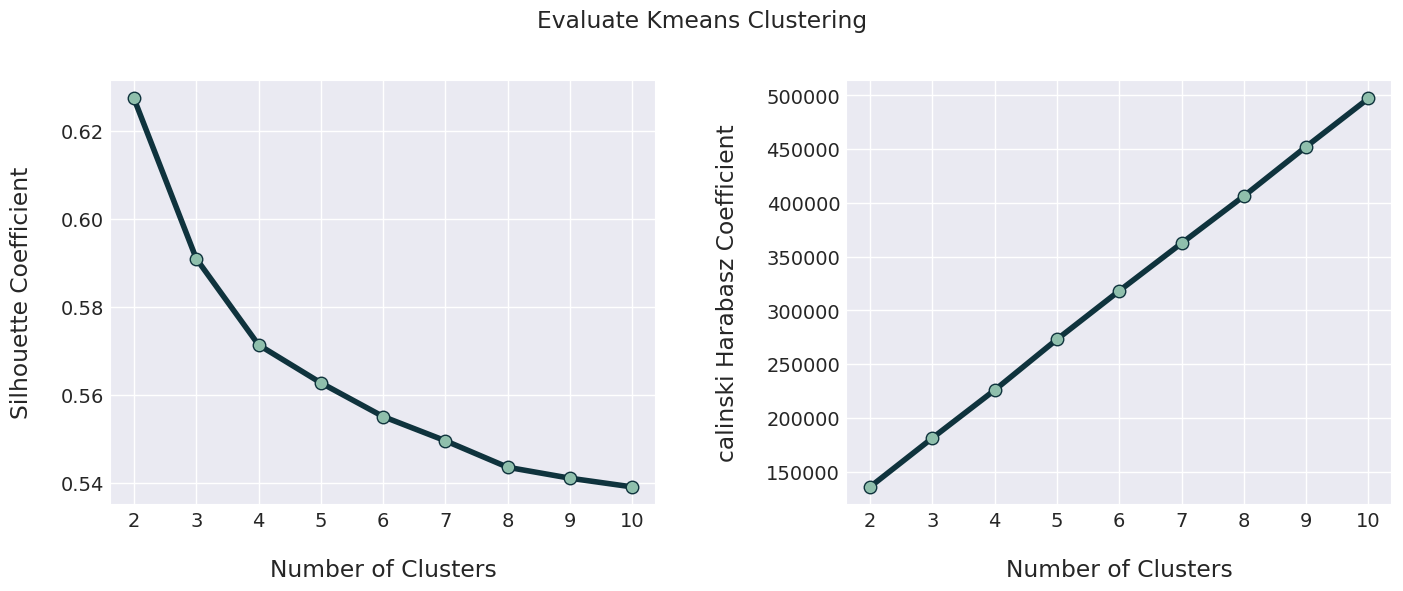

In [126]:
grafik_evaluasi_plot_k(silhouette_coef, calinski_harabasz_coef, 'Kmeans')

In [127]:
print(f"\n▪️Nilai k terbaik dari Silhouette Coefficient: {best_k_silhouette}")
print(f"▪️Nilai k terbaik dari Calinski-Harabasz Coefficient: {best_k_calinski_harabaz}")


▪️Nilai k terbaik dari Silhouette Coefficient: 2
▪️Nilai k terbaik dari Calinski-Harabasz Coefficient: 10


📌Despite the obtained best k from the hybrid score being 2, however, based on the characteristics of the dataset and the first approach, it has been determined that implementing the k-means clustering model with 3 clusters would yield more meaningful results.

In [87]:
kmeans    = KMeans(n_clusters=3,
                   **kmeans_params).fit(rfmt_scaled_df)

pred      = kmeans.labels_

centroids = kmeans.cluster_centers_

centroids = pd.DataFrame(centroids, columns = rfmt_scaled_df.columns)
centroids

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

recency  frequency  monetary_value    tenure  total_products   ratings
0  1.008050  -0.634727       -0.338852  0.656484       -0.410787 -0.409340
1 -0.625186  -0.638624       -0.315151 -1.039816       -0.399772 -0.402706
2 -0.456186   1.491424        0.766130  0.440942        0.949439  0.951160

In [88]:
silhoutte = silhouette_score(rfmt_scaled_df, pred)
calinski  = calinski_harabasz_score(rfmt_scaled_df, pred)

skor_kmeans = pd.DataFrame({'Skor Silhouette': [silhoutte],
                            'Calinski-Harabasz Score': [calinski]},
                            index=['k-means'])

<IPython.core.display.Javascript object>

In [89]:
skor_kmeans

Skor Silhouette  Calinski-Harabasz Score
k-means         0.309723              24339.76293

In [90]:
rfmt_scaled_df.reset_index(inplace=True)
rfmt_scaled_df.rename(columns={'index': 'Customer_ID'}, inplace=True)

In [91]:
rfmt.reset_index(inplace=True)
rfmt.rename(columns={'index': 'Customer_ID'}, inplace=True)

In [92]:
km_kluster_df = pd.concat([rfmt_scaled_df, pd.DataFrame(pred, columns=['k-means_Cluster'])], axis=1)
rfmt_cluster  = pd.concat([rfmt, pd.DataFrame(pred, columns=['k-means_Cluster'])], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
km_kluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45101 entries, 0 to 45100
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      45101 non-null  float64
 1   recency          45101 non-null  float64
 2   frequency        45101 non-null  float64
 3   monetary_value   45101 non-null  float64
 4   tenure           45101 non-null  float64
 5   total_products   45101 non-null  float64
 6   ratings          45101 non-null  float64
 7   k-means_Cluster  45101 non-null  int32  
dtypes: float64(7), int32(1)
memory usage: 2.6 MB


In [94]:
rfmt_cluster

Customer_ID  recency  frequency  monetary_value  tenure  \
0          10001.0      629          1      367.457739     629   
1          10002.0      475          1      503.282836     475   
2          10007.0      306          1     1968.318905     306   
3          10009.0      399          1       49.274554     399   
4          10010.0      436          2     1921.447432     449   
...            ...      ...        ...             ...     ...   
45096      99984.0      449          2     1095.493440     480   
45097      99989.0      245          3      207.277246     524   
45098      99994.0      345          3     7077.622614     699   
45099      99995.0      539          1      166.183753     539   
45100      99998.0      276          1      463.866247     276   

       total_products  ratings  k-means_Cluster  
0                 3.0      1.0                0  
1                 6.0      1.0                0  
2                 7.0      4.0                1  
3                 1.0      5.0                1  
4                12.0      8.0                2  
...               ...      ...              ...  
45096             4.0      9.0                2  
45097             7.0      7.0                2  
45098            25.0      7.0                2  
45099             4.0      2.0                0  
45100             6.0      1.0                1  

[45101 rows x 8 columns]

In [95]:
km_kluster_df

Customer_ID   recency  frequency  monetary_value    tenure  \
0          10001.0  1.484004  -0.669265       -1.150613  1.176883   
1          10002.0  0.269022  -0.669265       -0.927355 -0.170021   
2          10007.0 -0.958491  -0.669265        0.337030 -1.393773   
3          10009.0 -0.298558  -0.669265       -2.161225 -0.755927   
4          10010.0 -0.025157   1.445982        0.309734 -0.376659   
...            ...       ...        ...             ...       ...   
45096      99984.0  0.072239   1.445982       -0.272126 -0.129564   
45097      99989.0 -1.366907   1.644846       -1.505130  0.236220   
45098      99994.0 -0.686797   1.644846        2.122642  1.854088   
45099      99995.0  0.764130  -0.669265       -1.625983  0.364850   
45100      99998.0 -1.162027  -0.669265       -0.987348 -1.579326   

       total_products   ratings  k-means_Cluster  
0           -0.945654 -1.579384                0  
1           -0.102970 -1.579384                0  
2            0.115258  0.329400                1  
3           -1.912306  0.690022                1  
4            0.982605  1.505210                2  
...               ...       ...              ...  
45096       -0.621598  1.721981                2  
45097        0.115258  1.265645                2  
45098        2.475008  1.265645                2  
45099       -0.621598 -0.692042                0  
45100       -0.102970 -1.579384                1  

[45101 rows x 8 columns]

In [96]:
pred.shape

(45101,)

In [97]:
rfmt_cluster.isna().sum()

Customer_ID        0
recency            0
frequency          0
monetary_value     0
tenure             0
total_products     0
ratings            0
k-means_Cluster    0
dtype: int64

In [98]:
km_kluster_df.isna().sum()

Customer_ID        0
recency            0
frequency          0
monetary_value     0
tenure             0
total_products     0
ratings            0
k-means_Cluster    0
dtype: int64

In [99]:
rfmt_cluster.set_index('Customer_ID', inplace=True)

In [100]:
# size dari hasil cluster

size_klaster = rfmt_cluster.groupby('k-means_Cluster').size().to_frame()
size_klaster.columns = ["Size Cluster"]
size_klaster

Size Cluster
k-means_Cluster              
0                       15864
1                       15744
2                       13493

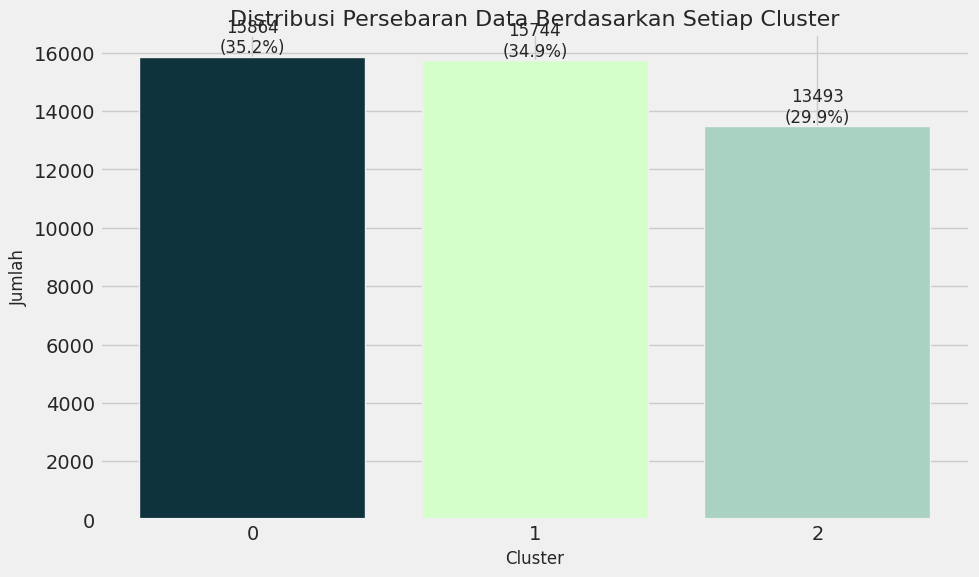

In [101]:
# Distribusi persebaran data untuk setiap kluster

# persebaran data
hitung = rfmt_cluster['k-means_Cluster'].value_counts()
label  = hitung.index.tolist()
size   = hitung.tolist()

# persentase
total  = sum(size)
persen = [(sizes/total) * 100 for sizes in size]
hitung = [f'{sizes}\n({persen[i]:.1f}%)' for i, sizes in enumerate(size)]

# viz
plt.figure(figsize=(10, 6))
kotak  = plt.bar(label, size, color=my_palette, linewidth=1)
plt.xticks(range(len(label)), [str(i) for i in range(len(label))])

for i, bar in enumerate(kotak):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             hitung[i], ha='center', va='bottom', fontsize=12)

plt.xlabel('Cluster', fontsize= 12)
plt.ylabel('Jumlah', fontsize= 12)
plt.title('Distribusi Persebaran Data Berdasarkan Setiap Cluster', fontsize= 16)
plt.show()

1. Cluster paling besar dan paling banyak itu ada pada kelas (0) dengan 15896 Customer, mencakupi sekitar 35.2% dari total keseluruhan jumlah Customer.
2. Cluster paling besar kedua yaitu pada kelas (1) dengan karakteristik yang hampir mirip dengan Cluster (0) namun mencakupi 34.8% dari total keseluruhan jumlah Customer.
3. Cluster dengan ukuran paling kecil yaitu kelas (2) yang mewakili 29.9% Customer.

In [102]:
rfmt_cluster[rfmt_cluster['k-means_Cluster'] == 0].head(10)

recency  frequency  monetary_value  tenure  total_products  \
Customer_ID                                                               
10001.0          629          1      367.457739     629             3.0   
10002.0          475          1      503.282836     475             6.0   
10017.0          636          1     1606.072815     636            10.0   
10019.0          617          1      671.549781     617             3.0   
10021.0          662          1     1258.009675     662             4.0   
10023.0          636          1      753.560395     636             4.0   
10026.0          509          1     2278.314099     509            10.0   
10034.0          475          1     1186.763792     475             6.0   
10037.0          525          2      540.039584     634             3.0   
10041.0          623          1     3536.776119     623             9.0   

             ratings  k-means_Cluster  
Customer_ID                            
10001.0          1.0                0  
10002.0          1.0                0  
10017.0          2.0                0  
10019.0          4.0                0  
10021.0          2.0                0  
10023.0          3.0                0  
10026.0          2.0                0  
10034.0          2.0                0  
10037.0          6.0                0  
10041.0          3.0                0

In [103]:
rfmt_cluster[rfmt_cluster['k-means_Cluster'] == 1].head(10)

recency  frequency  monetary_value  tenure  total_products  \
Customer_ID                                                               
10007.0          306          1     1968.318905     306             7.0   
10009.0          399          1       49.274554     399             1.0   
10020.0          287          1     1644.496853     287             5.0   
10024.0          362          1     3246.223438     362             7.0   
10035.0          461          1     1998.732471     461            10.0   
10042.0          391          1     2496.149957     391             5.0   
10050.0           93          1     2090.088798      93             6.0   
10052.0          411          1      784.623637     411             5.0   
10053.0          446          1     4234.836078     446            10.0   
10059.0          376          1      752.259919     376             6.0   

             ratings  k-means_Cluster  
Customer_ID                            
10007.0          4.0                1  
10009.0          5.0                1  
10020.0          5.0                1  
10024.0          1.0                1  
10035.0          4.0                1  
10042.0          4.0                1  
10050.0          2.0                1  
10052.0          3.0                1  
10053.0          2.0                1  
10059.0          3.0                1

In [104]:
rfmt_cluster[rfmt_cluster['k-means_Cluster'] == 2].head(10)

recency  frequency  monetary_value  tenure  total_products  \
Customer_ID                                                               
10010.0          436          2     1921.447432     449            12.0   
10015.0          453          2      747.583851     591             5.0   
10028.0          154          2     2105.746195     306            13.0   
10032.0          307          2     5756.562385     578            14.0   
10036.0          184          2     4195.405080     510            11.0   
10038.0          533          2     2127.351910     569             7.0   
10040.0          361          2     3364.171853     395            15.0   
10058.0          427          2     3671.751085     586            11.0   
10061.0            2          2     2653.593596     365            16.0   
10062.0          124          3     2477.728262     640             7.0   

             ratings  k-means_Cluster  
Customer_ID                            
10010.0          8.0                2  
10015.0          5.0                2  
10028.0          6.0                2  
10032.0          7.0                2  
10036.0          4.0                2  
10038.0          6.0                2  
10040.0          6.0                2  
10058.0          9.0                2  
10061.0          4.0                2  
10062.0         11.0                2

In [105]:
rata2_cluster = rfmt_cluster.groupby(['k-means_Cluster'], as_index=False).mean()
rata2_cluster.style.set_properties(**{'font-family': 'Segoe UI'}).hide()

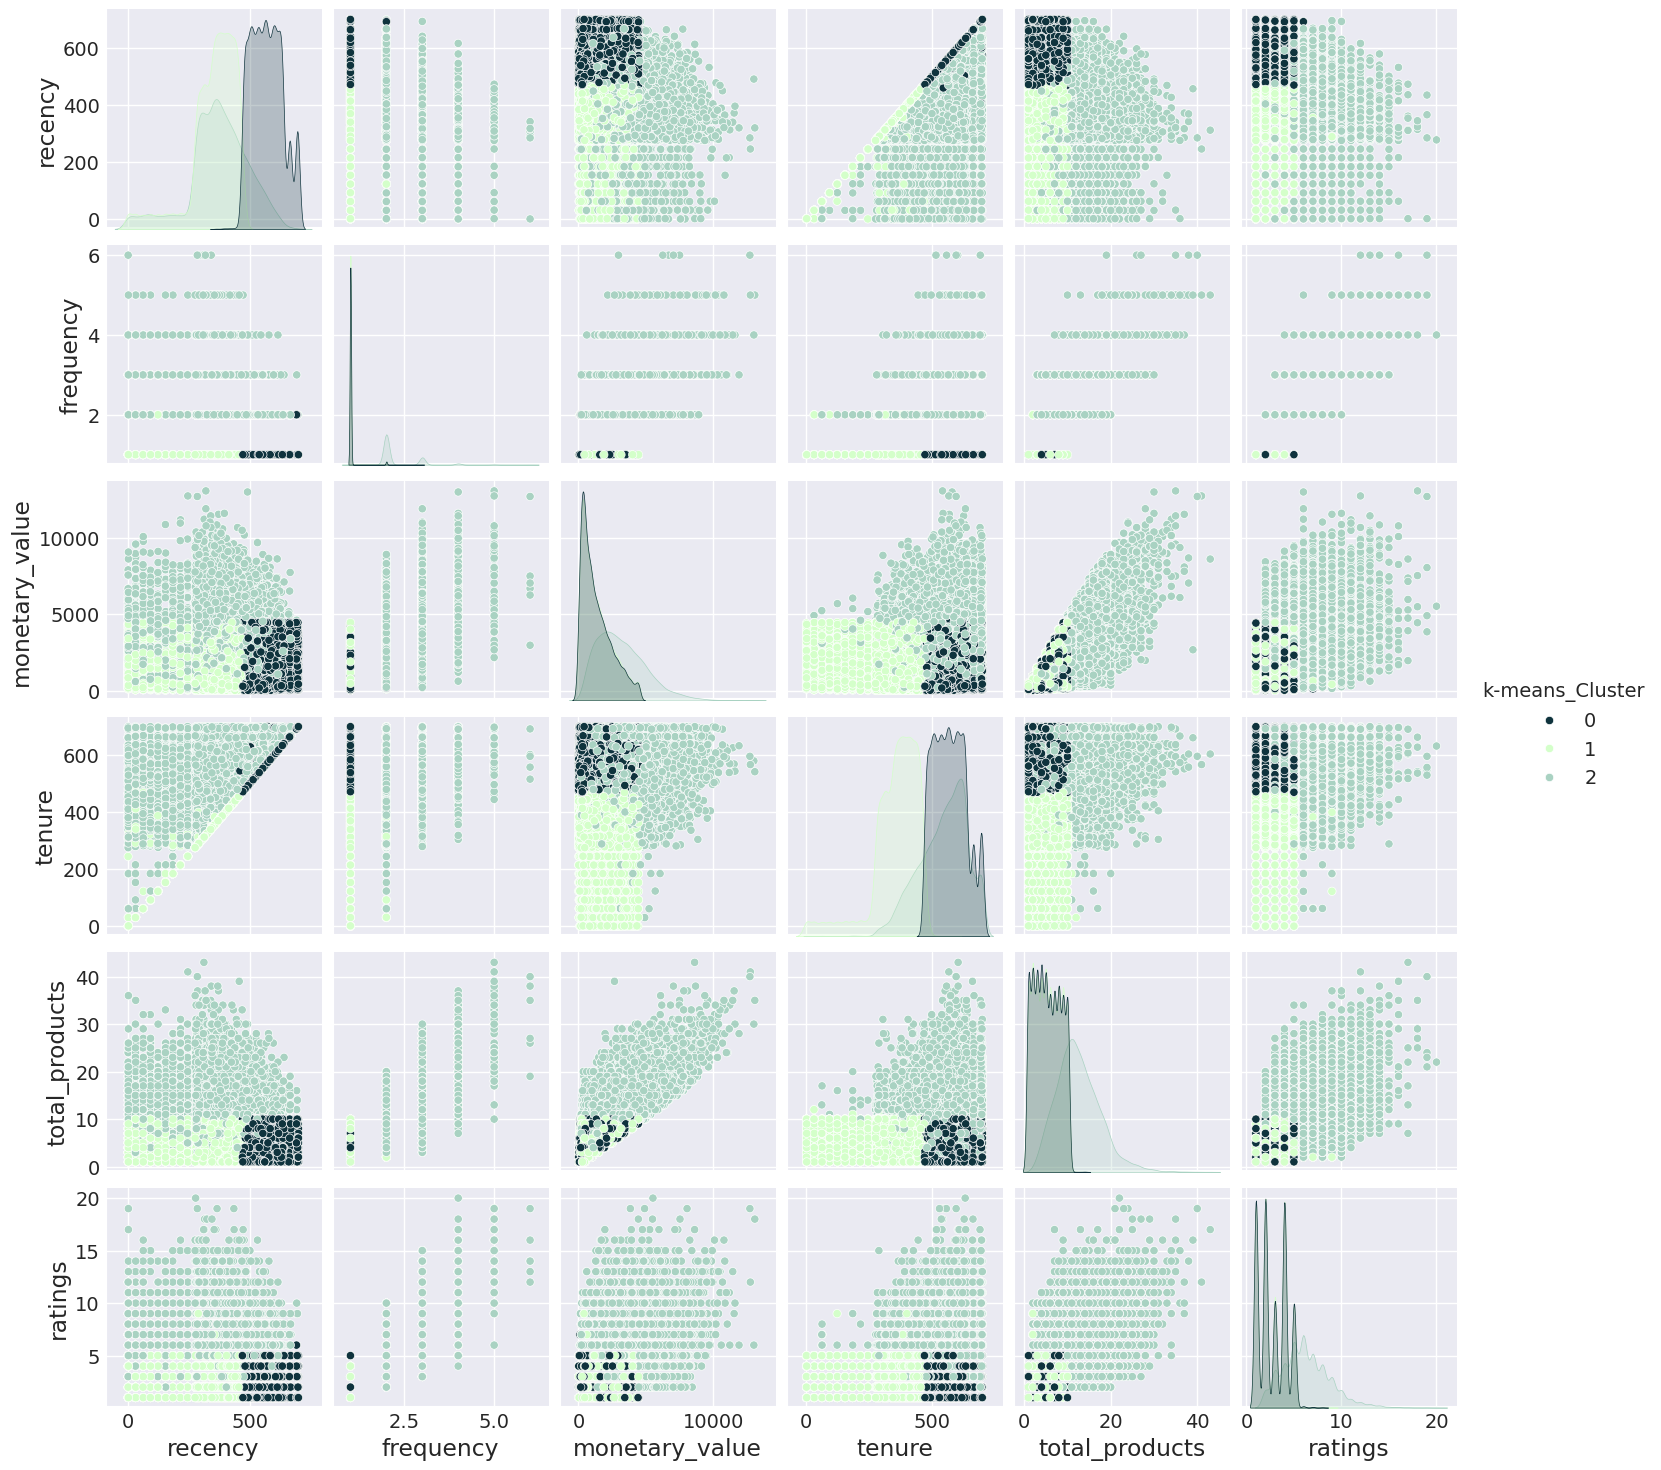

In [106]:
sns.set_style('darkgrid')
sns.pairplot(rfmt_cluster, hue='k-means_Cluster', palette=colors)
plt.show()

1. Strong correlations are seen between frequency, monetary value, and total products. Customers who shop frequently tend to spend more money and buy more products.
2. Tenure has a positive correlation with frequency and monetary value, suggesting long-time customers tend to be more valuable.
3. Recency is negatively correlated with frequency and monetary value, indicating customers who have recently shopped tend to be more active and valuable.
4. Ratings show no clear pattern in distinguishing clusters, indicating customer satisfaction may not always correlate with purchase behavior.

In [107]:
rfmt_cluster.columns

Index(['recency', 'frequency', 'monetary_value', 'tenure', 'total_products',
       'ratings', 'k-means_Cluster'],
      dtype='object')

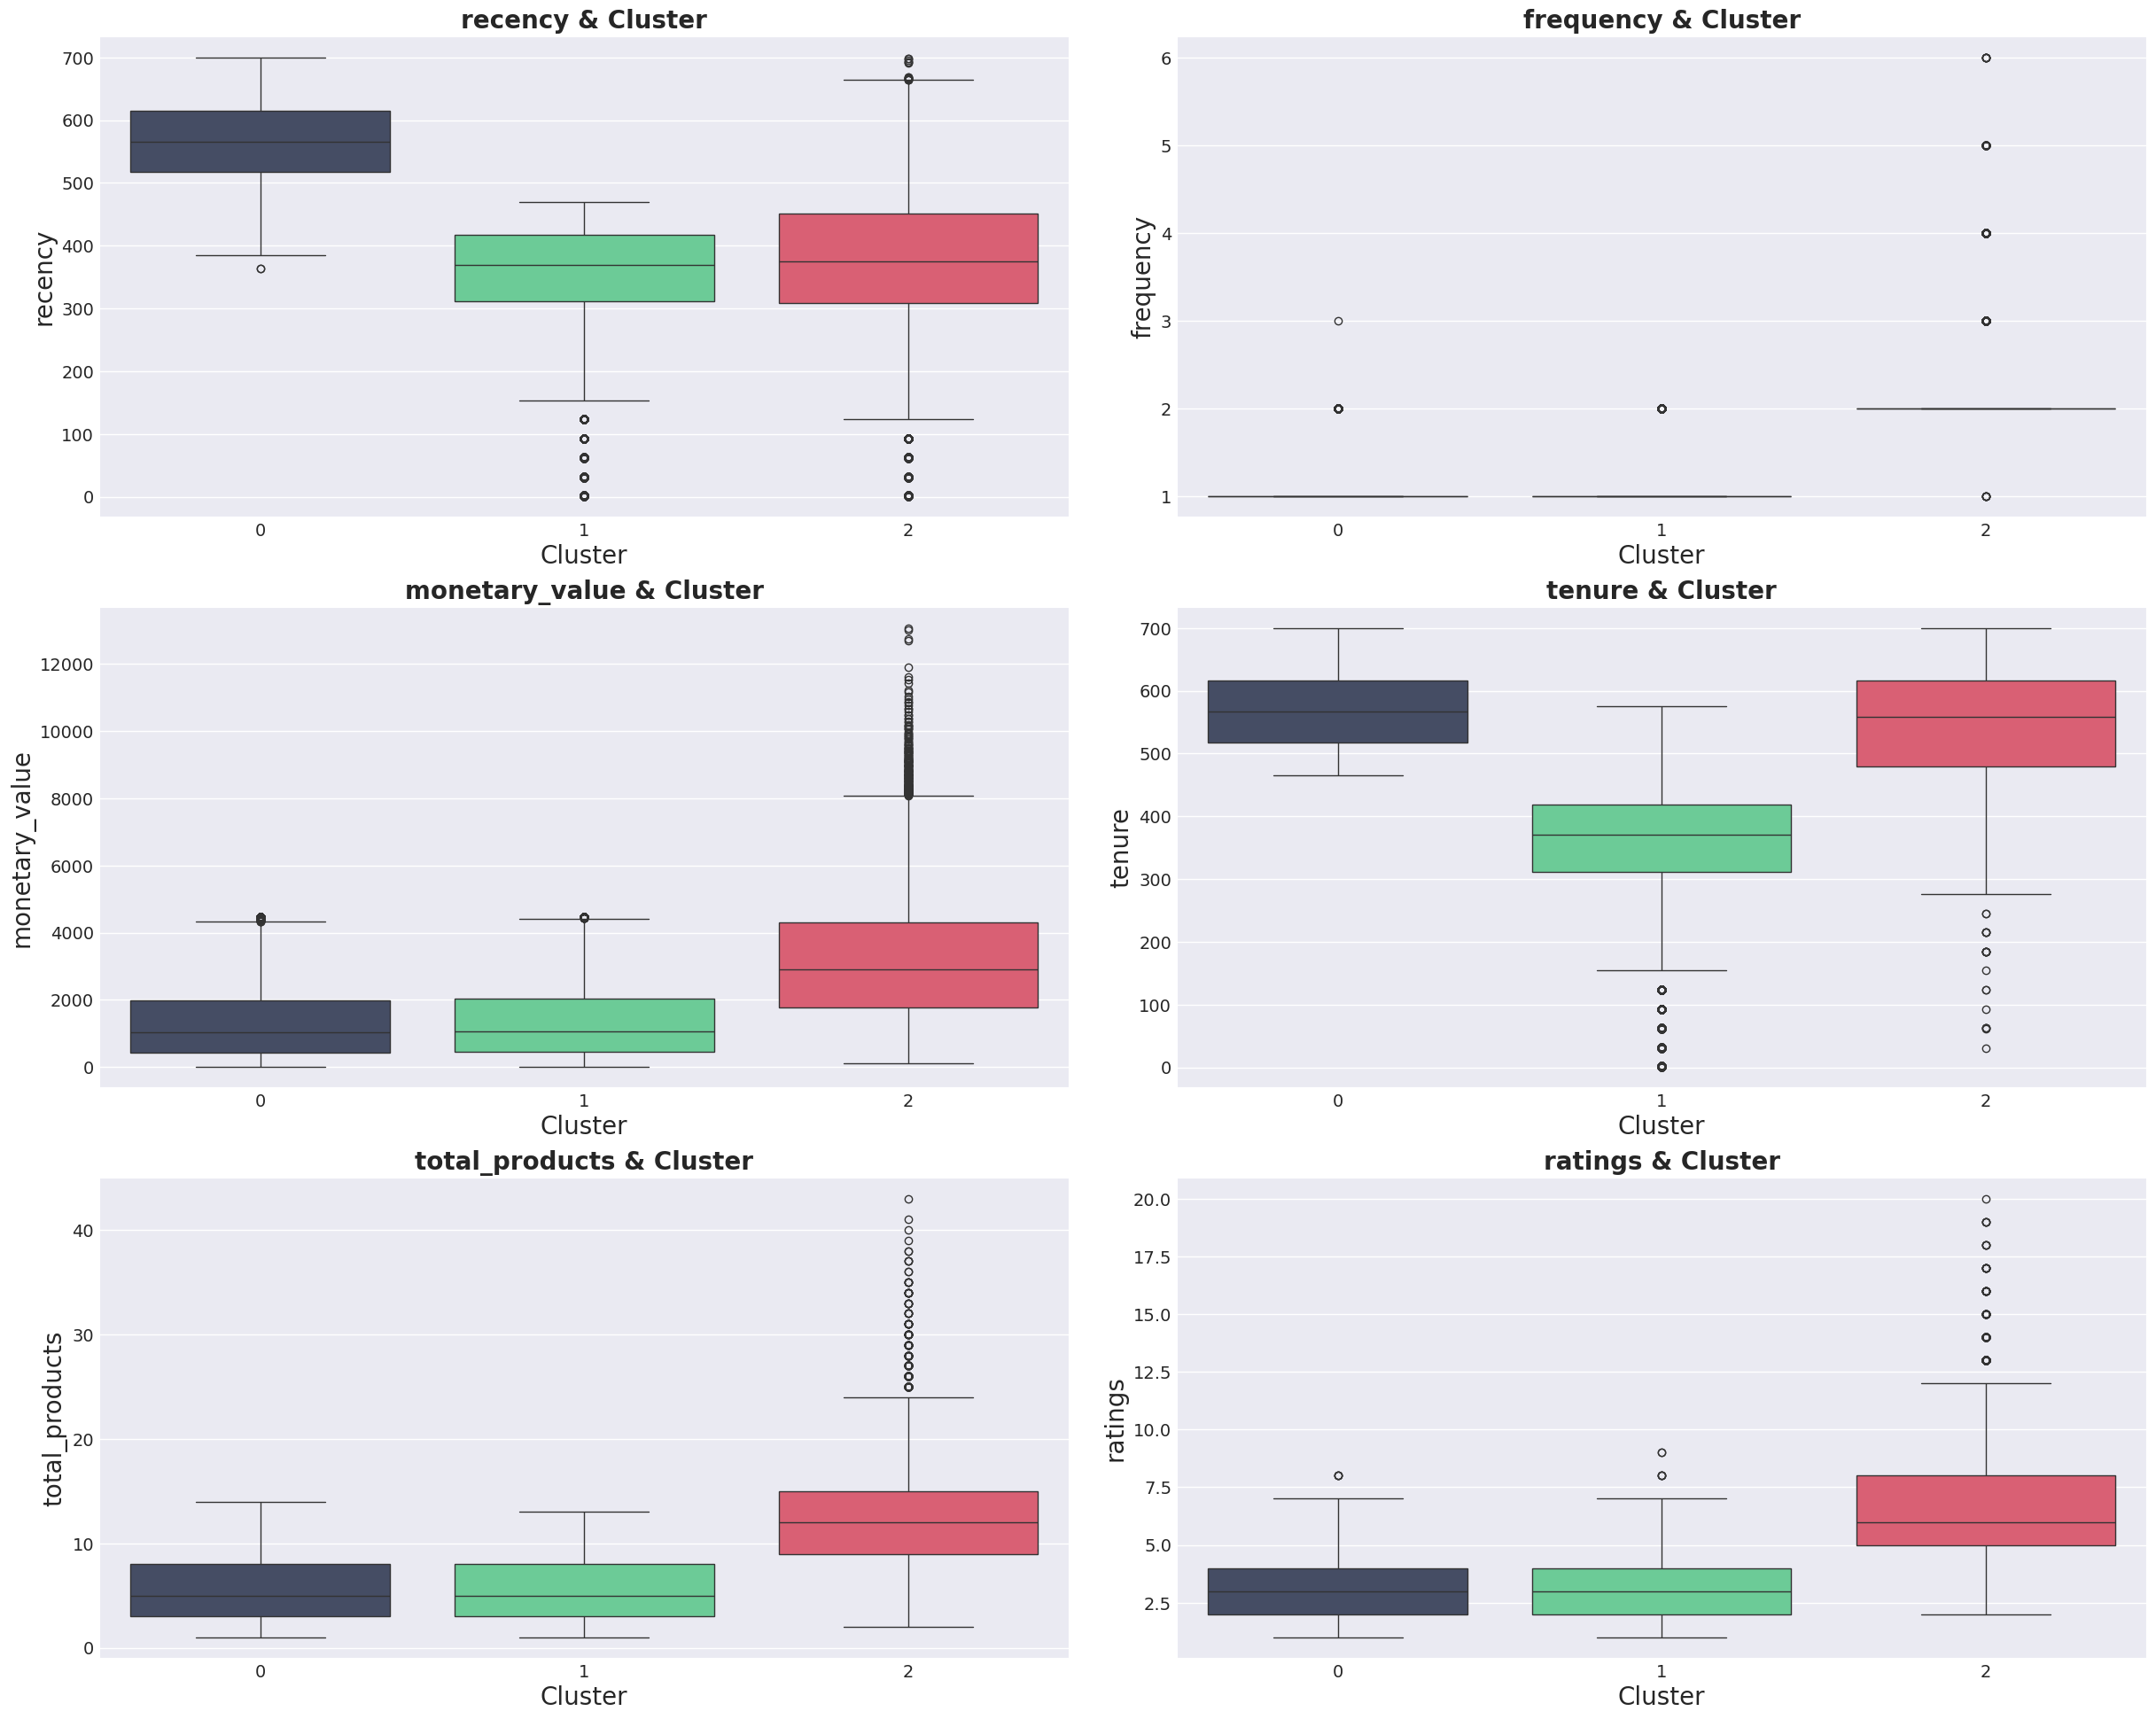

In [108]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,20))
colors3 = ['#404B69', '#5CDB95', '#ED4C67', '#F7DC6F']

fig.tight_layout(pad=3.5)

for i, feature in enumerate(rfmt_cluster.columns[:-1]):

    sns.boxplot(data=rfmt_cluster,
                x='k-means_Cluster',
                y=feature,
                palette=colors3,
                ax=ax[i//2, i%2])

    ax[i//2, i%2].set_title('{} & Cluster'.format(feature), fontweight='bold', fontsize=20)
    ax[i//2, i%2].set_xlabel('Cluster', fontsize=20)
    ax[i//2, i%2].set_ylabel(feature, fontsize=20)

plt.show()

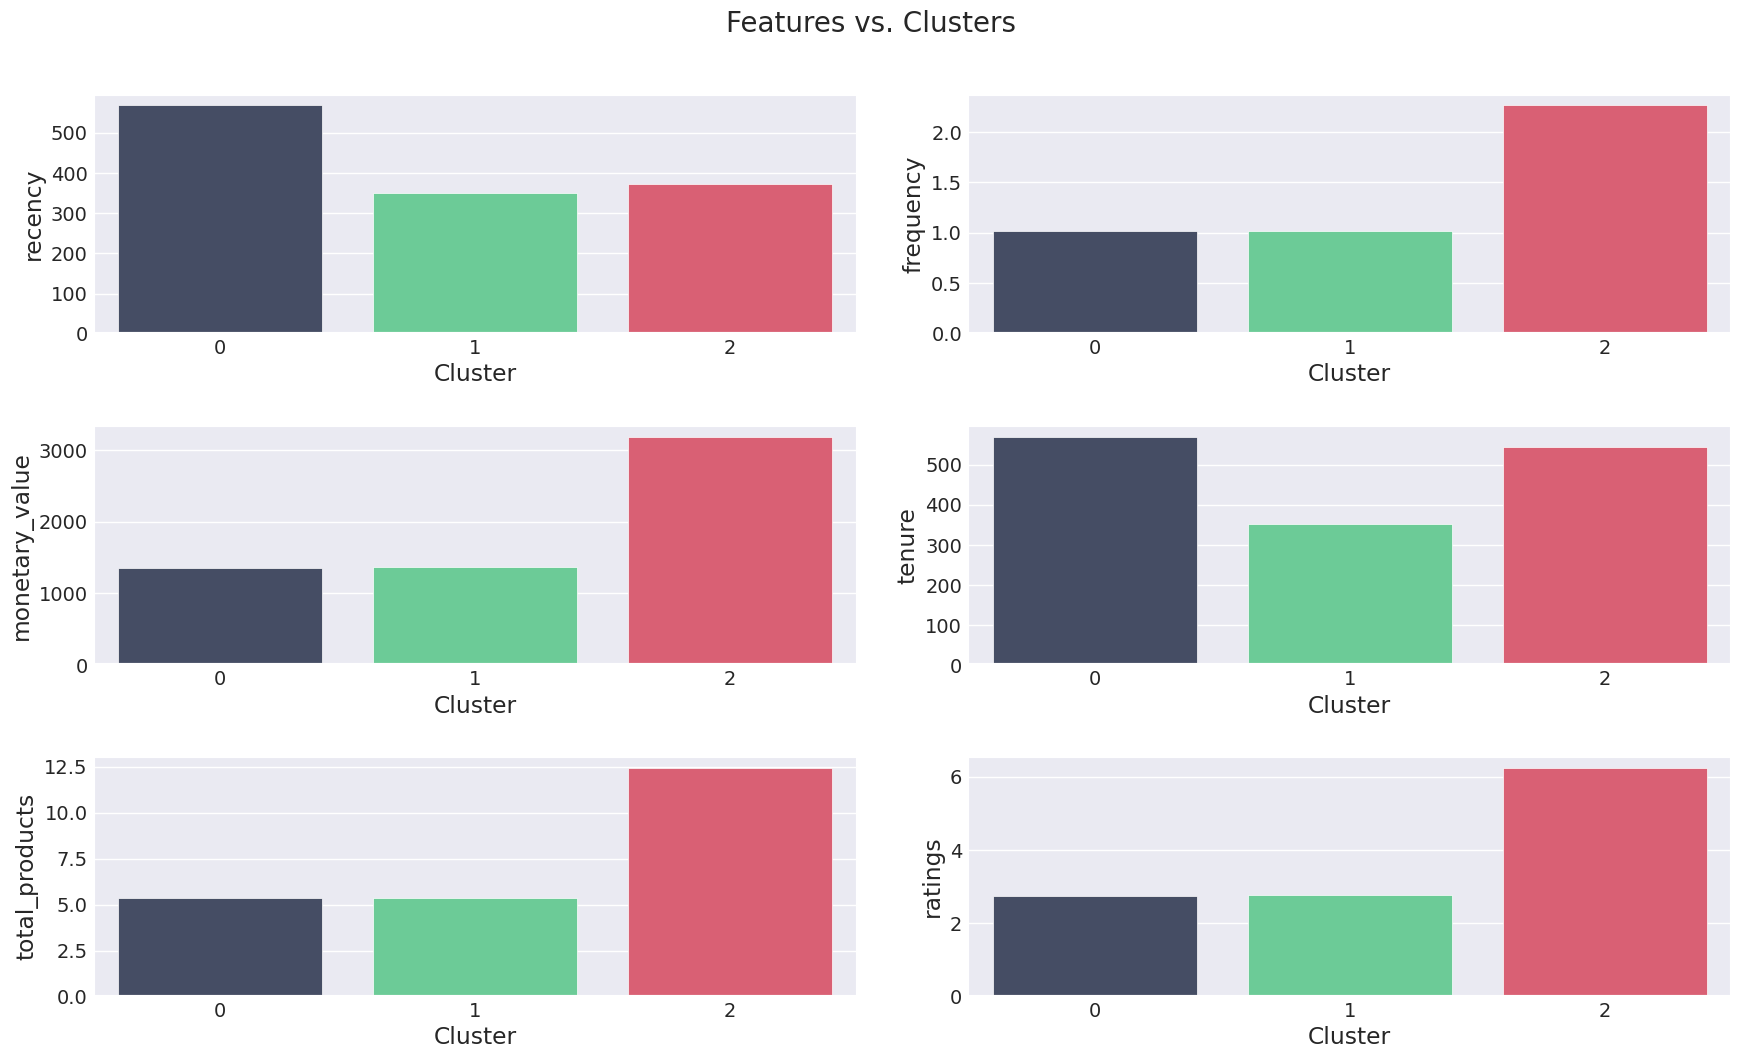

In [109]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 11))

for i, col in enumerate(rfmt_cluster.columns[:-1]):

    sns.barplot(data=rata2_cluster,
                x='k-means_Cluster',
                y=col,
                ax=axes[i//2, i%2],
                palette=colors3)

    axes[i//2, i%2].set_xlabel('Cluster')
    axes[i//2, i%2].set_ylabel(col)

plt.suptitle('Features vs. Clusters', fontsize=20)
fig.tight_layout(pad=2.0)
plt.show()

In [110]:
rfmt_cluster = rfmt_cluster.reset_index()
rfmt_cluster.loc[rfmt_cluster['k-means_Cluster'] == 0, 'k-means_Cluster'] = 'Dormant Long-term Customers'
rfmt_cluster.loc[rfmt_cluster['k-means_Cluster'] == 1, 'k-means_Cluster'] = 'Emerging Potential Shoppers'
rfmt_cluster.loc[rfmt_cluster['k-means_Cluster'] == 2, 'k-means_Cluster'] = 'High-Value Active Enthusiasts'
rfmt_cluster.head(5)

Customer_ID  recency  frequency  monetary_value  tenure  total_products  \
0      10001.0      629          1      367.457739     629             3.0   
1      10002.0      475          1      503.282836     475             6.0   
2      10007.0      306          1     1968.318905     306             7.0   
3      10009.0      399          1       49.274554     399             1.0   
4      10010.0      436          2     1921.447432     449            12.0   

   ratings                k-means_Cluster  
0      1.0    Dormant Long-term Customers  
1      1.0    Dormant Long-term Customers  
2      4.0    Emerging Potential Shoppers  
3      5.0    Emerging Potential Shoppers  
4      8.0  High-Value Active Enthusiasts

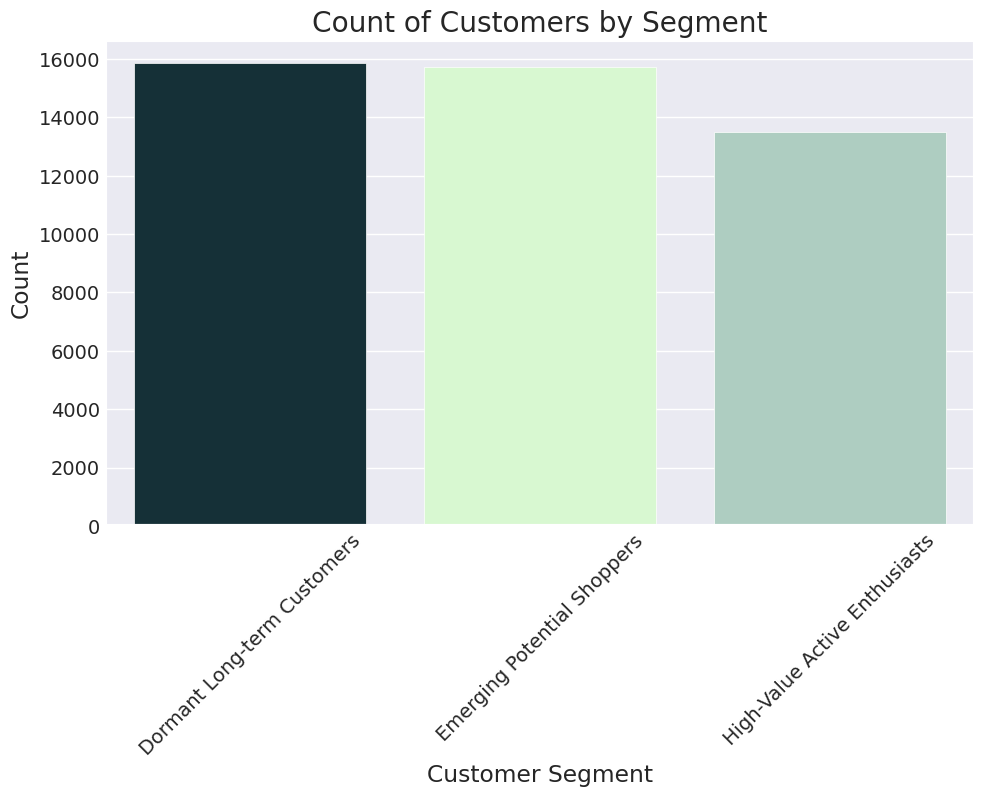

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rfmt_cluster, x='k-means_Cluster', palette=colors)
plt.title('Count of Customers by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- **Customer Cluster = 0️⃣** --> Old customers who have not transacted for a long time, rarely buy, and have low shopping value. Although they have been customers for a long time, they are less active and give low ratings.

    ---
- **Customer Cluster = 1️⃣** --> Relatively new customers with moderate purchase activity. They have the potential to be developed into more active and valuable customers.

    ---
- **Customer Cluster = 2️⃣** --> Most active and high-value customers. They shop the most, spend the most money, buy the most products, and give the highest ratings.


Characteristics:
- Cluster 2 shows the best purchasing behavior in all aspects.
- Cluster 0, although an existing customer, has the worst purchasing behavior.
- Cluster 1 shows growth potential.

#### 1. Purchase History and Customer Demographics Data Analysis

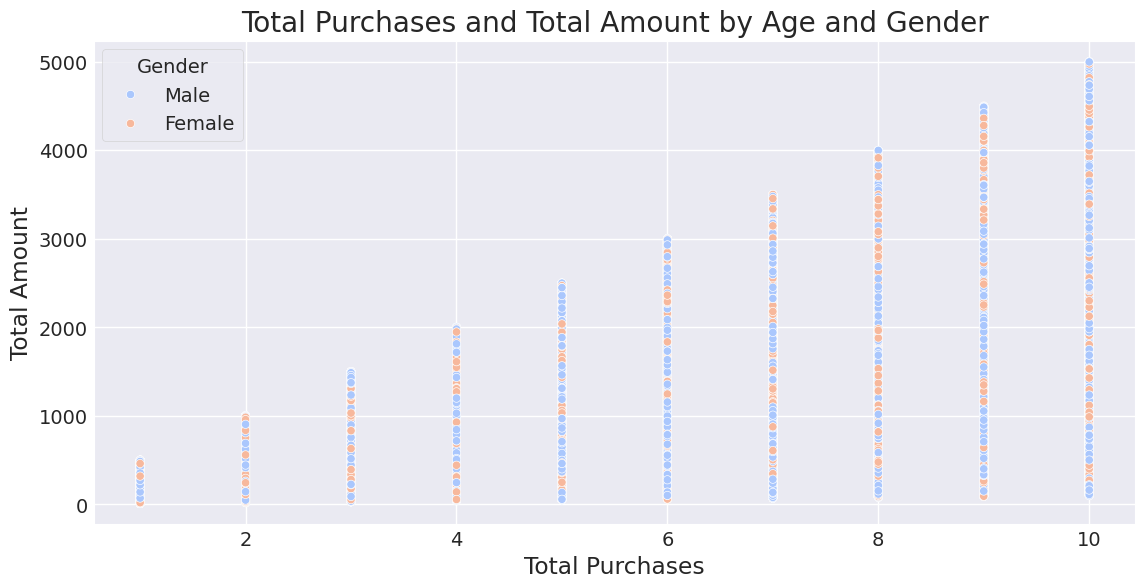

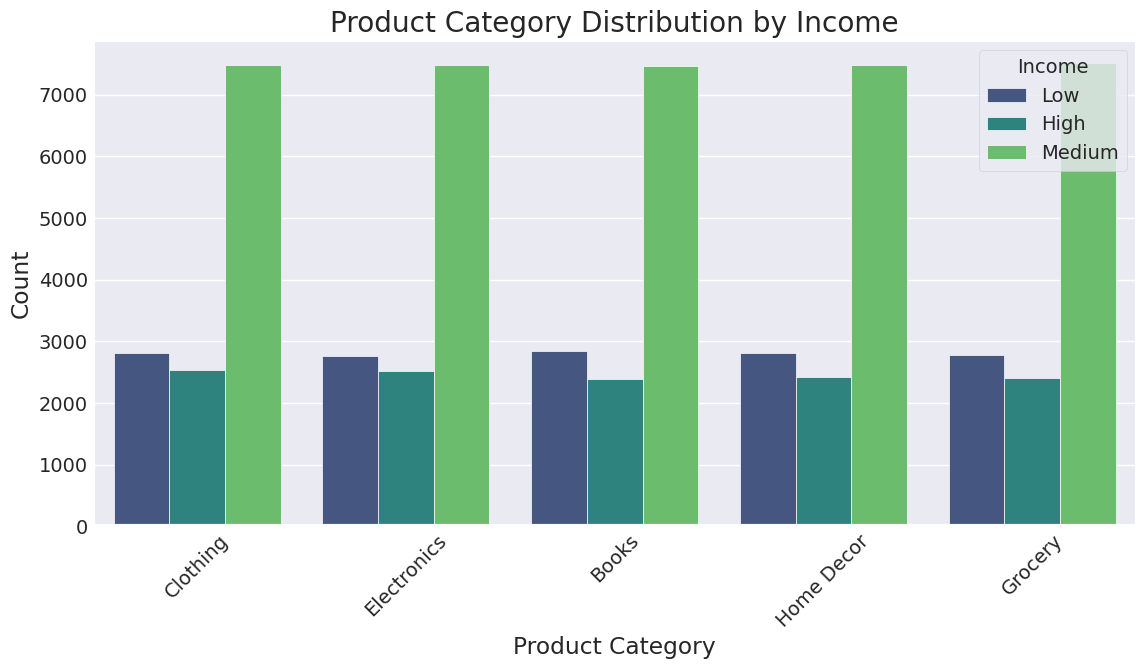

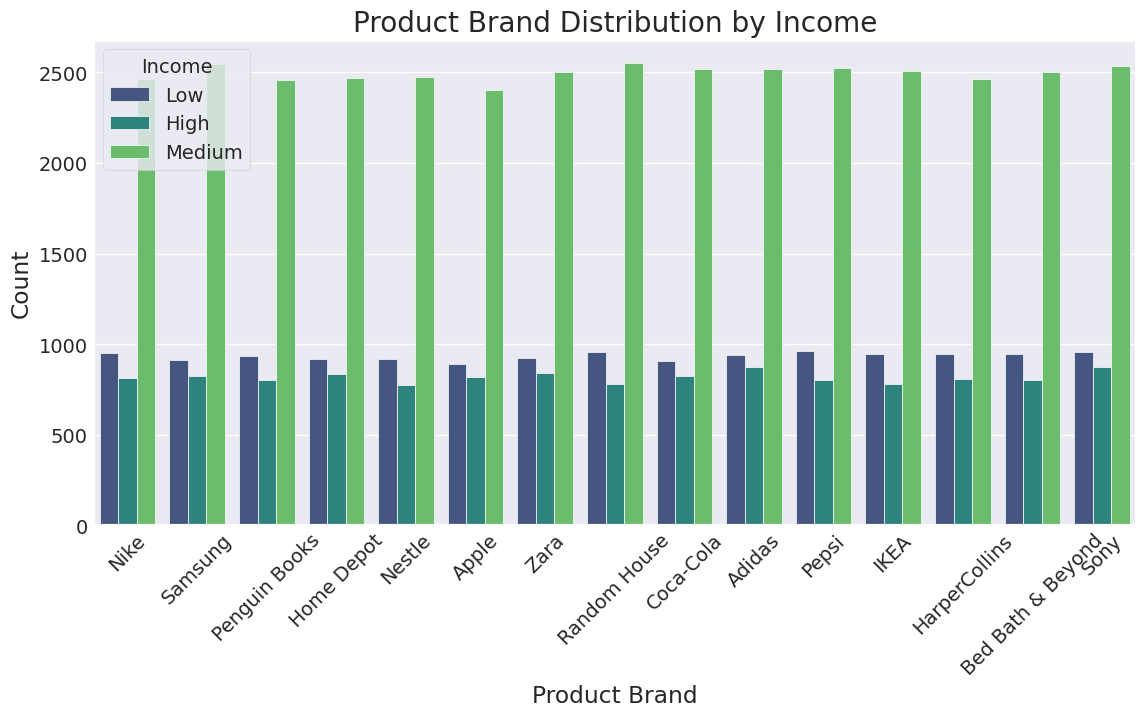

In [112]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total_Purchases', y='Total_Amount', hue='Gender', palette='coolwarm')
plt.title('Total Purchases and Total Amount by Age and Gender')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', hue='Income', palette='viridis')
plt.title('Product Category Distribution by Income')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Brand', hue='Income', palette='viridis')
plt.title('Product Brand Distribution by Income')
plt.xlabel('Product Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### 2. Behavior Pattern Analysis and Reactivation Strategy

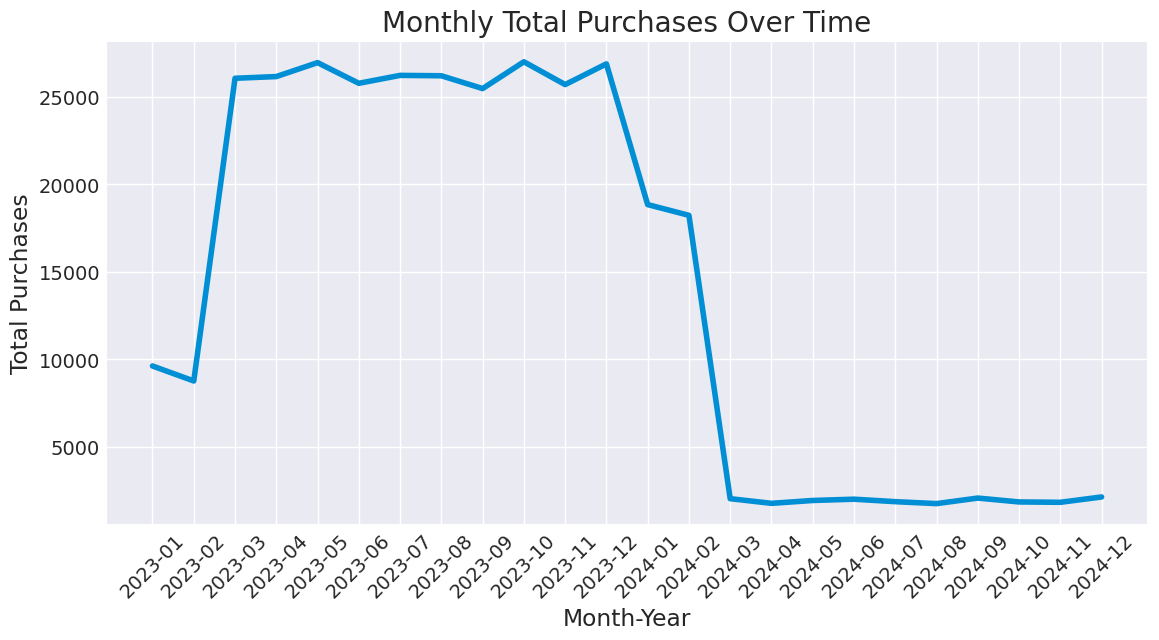

In [113]:
plt.figure(figsize=(12, 6))
df2['Month_Year'] = df2['Waktu'].dt.to_period('M')
monthly_purchases = df2.groupby('Month_Year')['Total_Purchases'].sum().reset_index()
monthly_purchases['Month_Year'] = monthly_purchases['Month_Year'].dt.strftime('%Y-%m')  # Convert to string
sns.lineplot(data=monthly_purchases, x='Month_Year', y='Total_Purchases')
plt.title('Monthly Total Purchases Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()

#### 3. Preference and Product Analysis

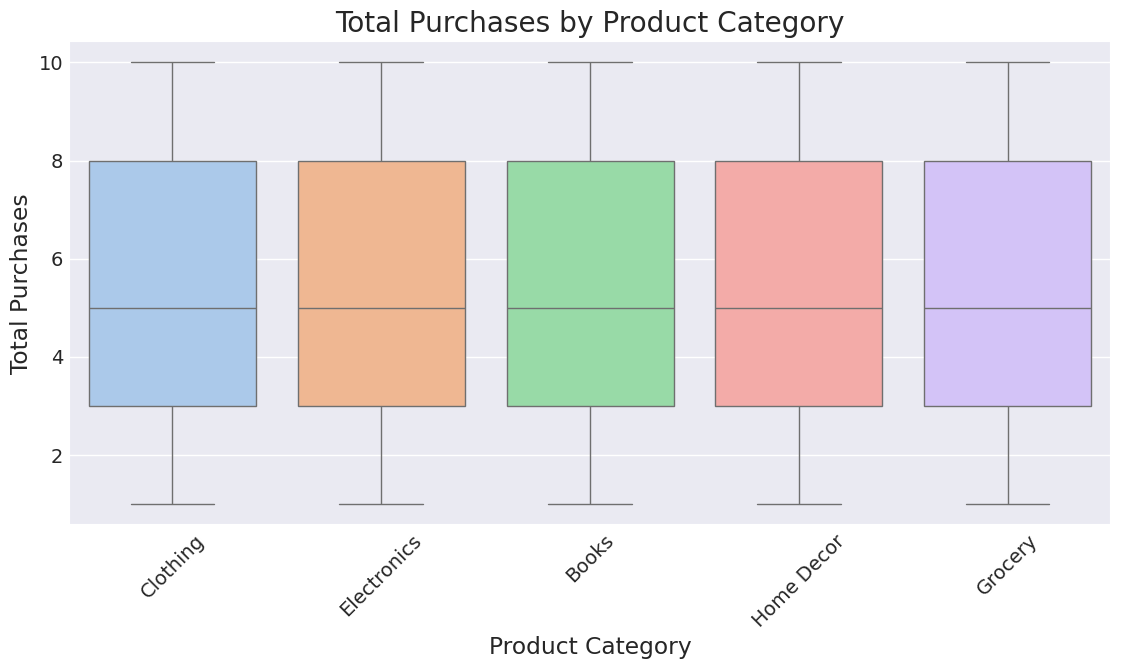

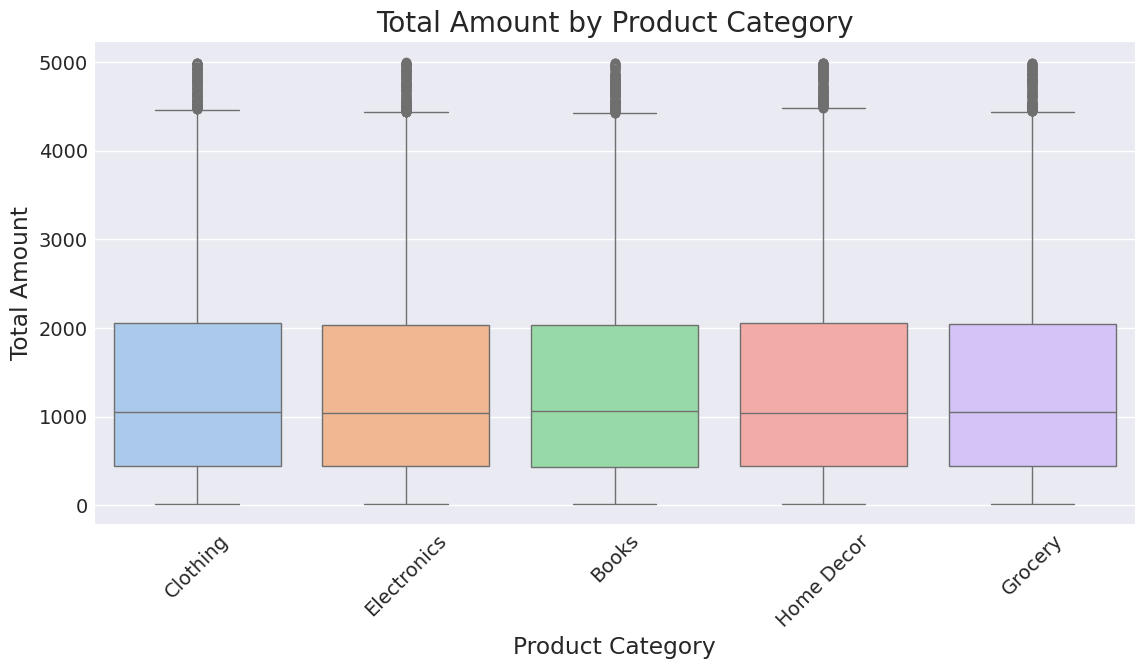

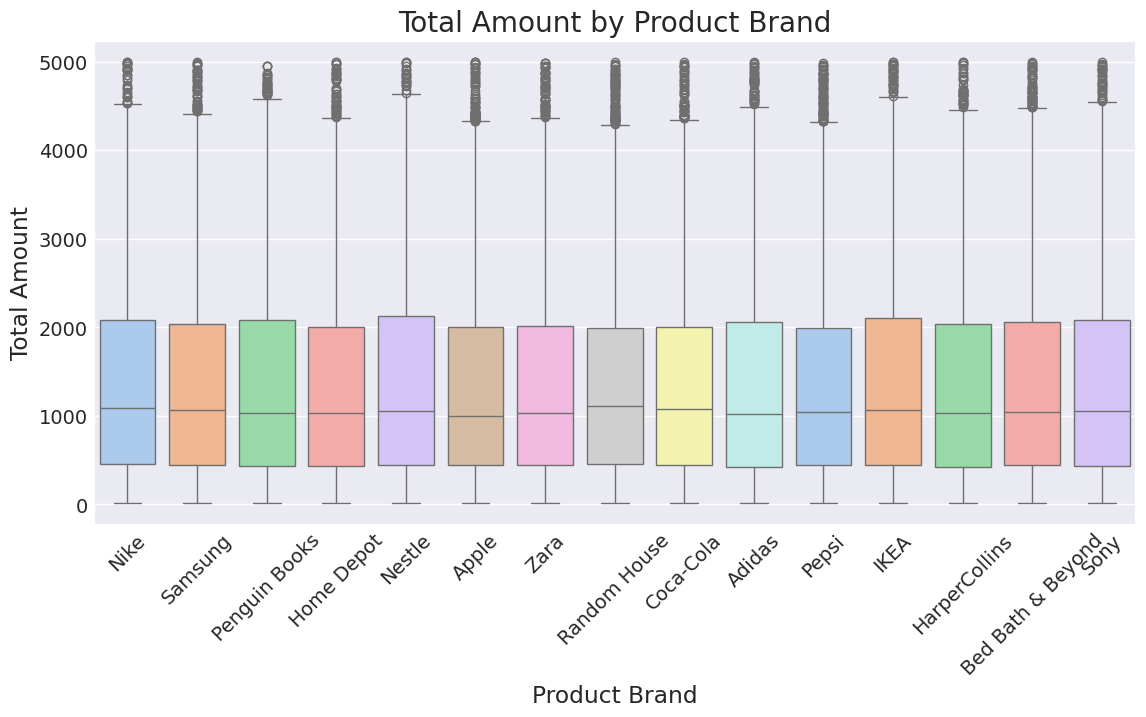

In [114]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category', y='Total_Purchases', palette='pastel')
plt.title('Total Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category', y='Total_Amount', palette='pastel')
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Brand', y='Total_Amount', palette='pastel')
plt.title('Total Amount by Product Brand')
plt.xlabel('Product Brand')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


#### 4. Preference Analysis and Loyalty Program

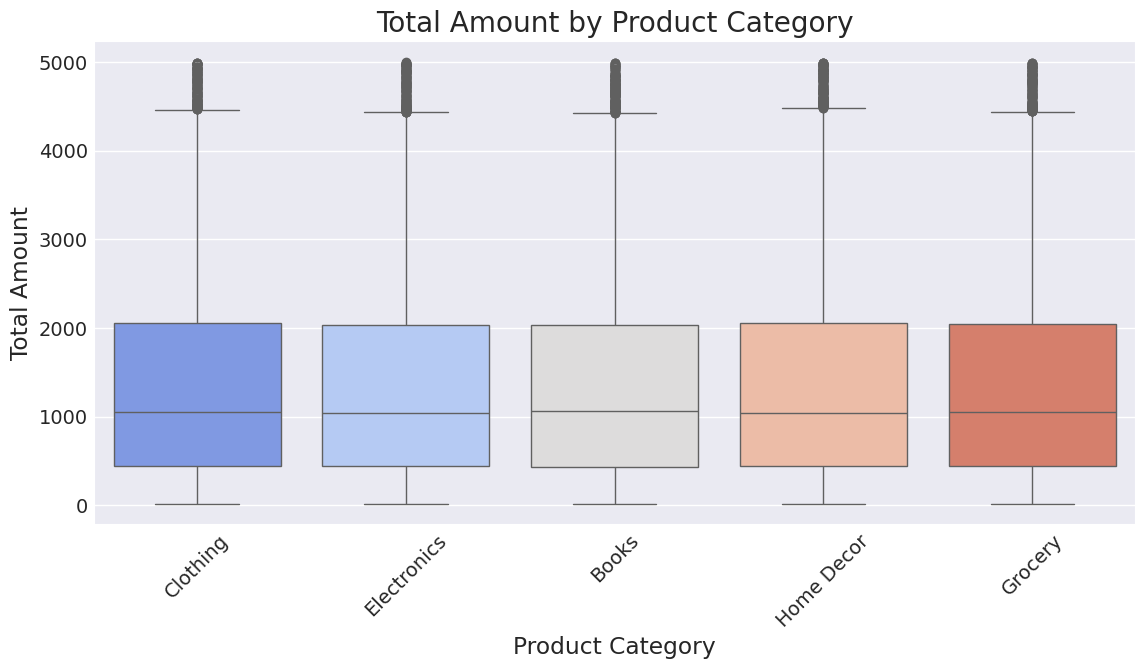

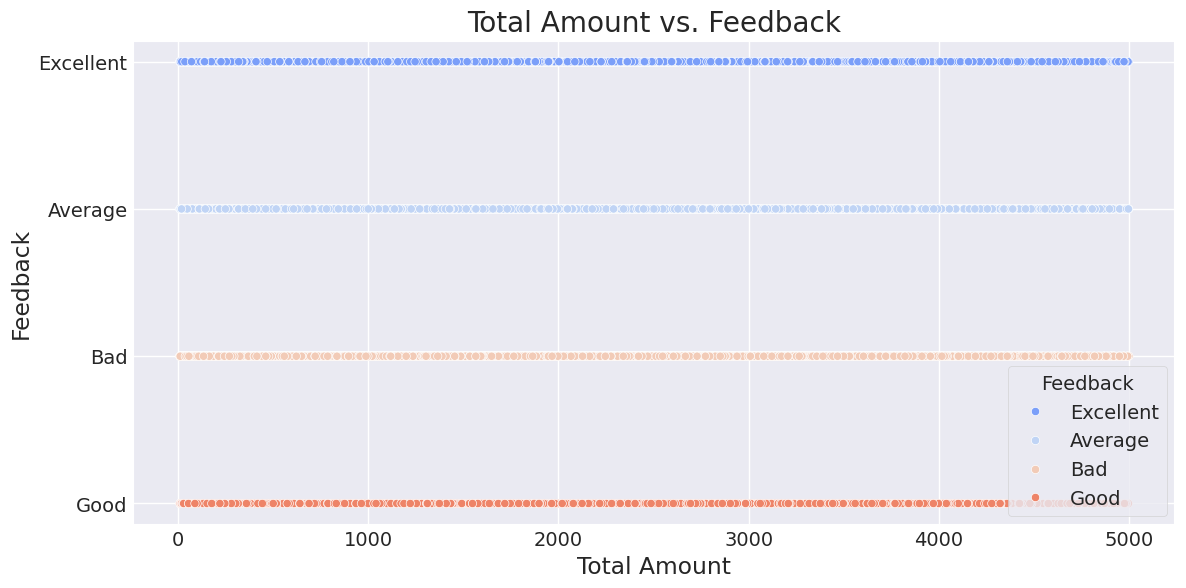

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category', y='Total_Amount', palette='coolwarm')
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Total_Amount', y='Feedback', hue='Feedback', palette='coolwarm')
plt.title('Total Amount vs. Feedback')
plt.xlabel('Total Amount')
plt.ylabel('Feedback')
plt.show()

#### 5. Customer Experience Analysis

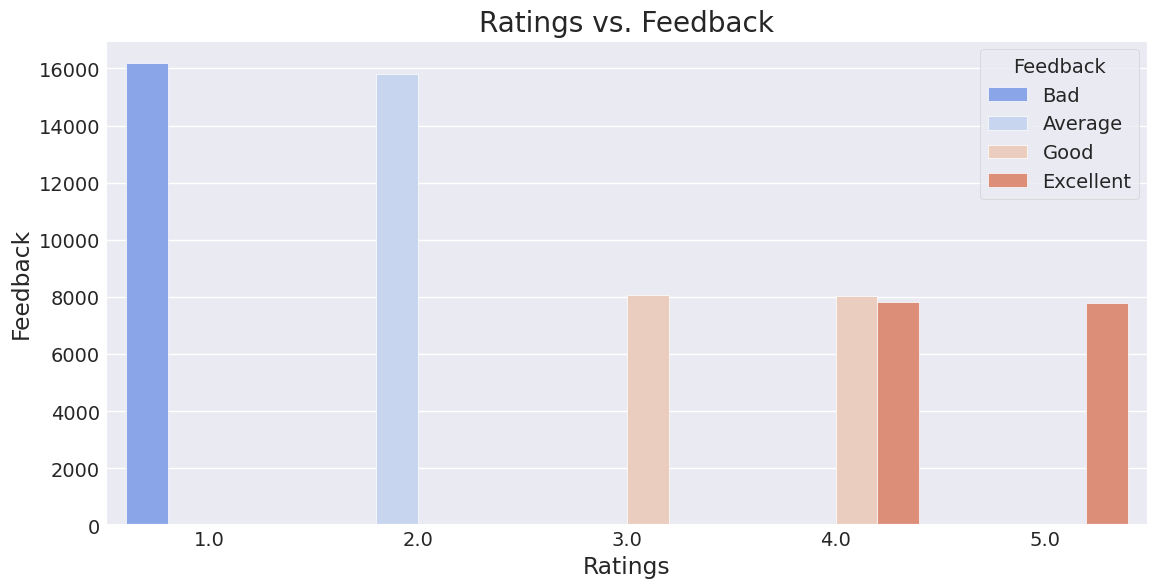

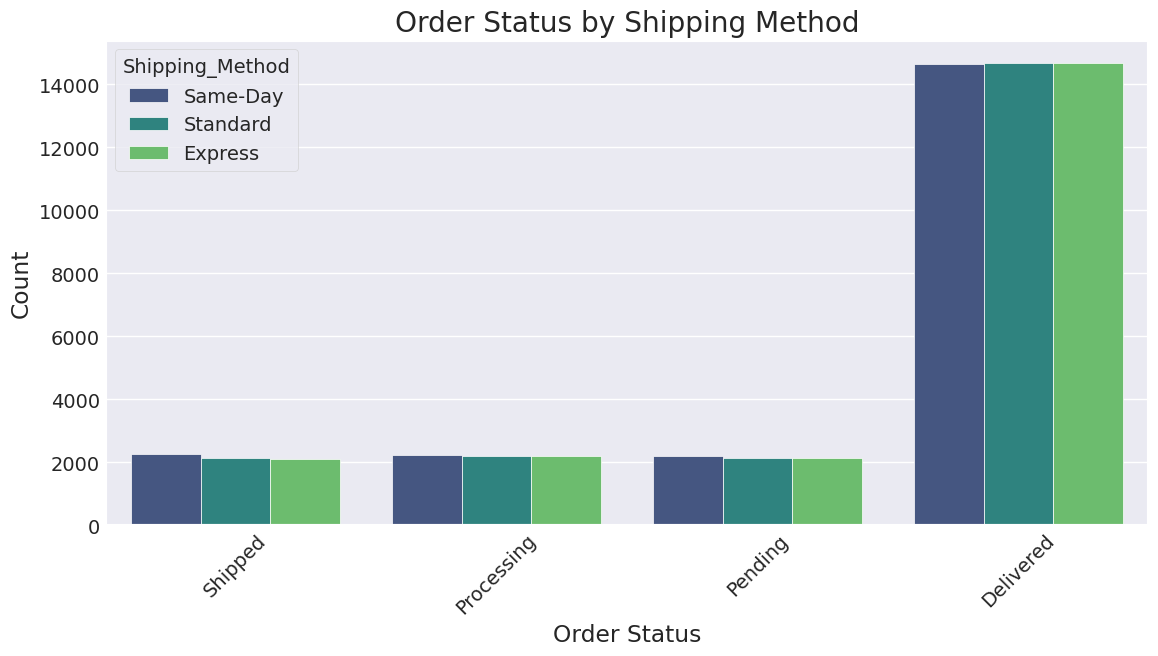

In [116]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Ratings', hue='Feedback', palette='coolwarm')
plt.title('Ratings vs. Feedback')
plt.xlabel('Ratings')
plt.ylabel('Feedback')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Order_Status', hue='Shipping_Method', palette='viridis')
plt.title('Order Status by Shipping Method')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### 1. Implementation of personalization strategies for each segment.
    - Dormant Long-term Customers: Send personalized emails with special offers or exclusive discounts to attract them back. For example, give a 20% discount on a product they frequently bought before.
    - Emerging Potential Shoppers: Offer product recommendations based on their purchase history and invite them to subscribe to the newsletter to get information about new products and exclusive offers.
    - High-Value Active Enthusiasts: Provide access to exclusive products before they are launched to the general market and invite them to participate in loyalty programs with attractive rewards.
---

#### 2. Focus on increasing engagement for "Dormant Long-term Customers".
    - Send email campaigns asking why they stopped shopping and offer incentives to provide feedback.
    - Hold contests or sweepstakes with attractive prizes that encourage them to shop again.
---

#### 3. Special development program for "Emerging Potential Shoppers".
    - Offer exclusive memberships with benefits such as discounts, early access to sales, and special events.
    - Create a referral program that encourages them to invite friends and family to shop on your platform.
---

#### 4. Exclusive reward and loyalty programs for "High-Value Active Enthusiasts".
    - Give reward points for every purchase that can be redeemed for discounts or free products.
    - Invite them to join a VIP program with access to exclusive offers, special events and priority customer service.
---

#### 5. Enhance customer experience to increase the correlation between ratings and purchase behavior.
    - Improve customer service with quick responses to complaints and inquiries.
    - Conduct regular customer satisfaction surveys and use the feedback to improve product and service quality.

In [117]:
# import pickle

# with open('yourpath.pkl', 'wb') as file:
#     pickle.dump(rfmt_scaled_df, file)

# with open('yourpath.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

# with open('yourpath.pkl', 'wb') as file:
#     pickle.dump(kmeans, file)

# with open('yourpath.pkl', 'wb') as file:
#     pickle.dump(km_kluster_df, file)